# Final - Project

# Analysis of Statistical Inference Methods vs Traditional ML 

### Submitted by:
#### Name      : Muhammad Amin Ghias
#### ERP ID    : 25366

Date : 31st January 2022

# Analysis on Datasets for Regression

# Regression Dataset #3

# Importing Libraraies

In [1]:
import pandas as pd
import pymc3 as pm
import numpy as np
import theano.tensor as tt
import matplotlib.pyplot as plt

# %matplotlib inline
import arviz as az
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import graphviz
import os


WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:


import lazypredict
from lazypredict.Supervised import LazyRegressor

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# To display all the columns of dataframe
pd.set_option('display.max_columns', 500)
import warnings
warnings.filterwarnings("ignore")

from sklearn import preprocessing

import matplotlib.pyplot as plt

import seaborn as sns

from scipy.stats import skew
from scipy.stats import kurtosis

from sklearn.feature_selection import mutual_info_classif

from sklearn.feature_selection import mutual_info_regression

from sklearn.decomposition import PCA

import time

from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split, RepeatedKFold, GridSearchCV, cross_val_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import MinMaxScaler

from sklearn.pipeline import Pipeline


import warnings 
warnings.filterwarnings('ignore')


from sklearn.preprocessing import LabelEncoder

import time


from numpy import mean



from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
# import statsmodels.api as sm
from sklearn.feature_selection import SequentialFeatureSelector
import os

import matplotlib
import seaborn as sns

import plotly.express as px

from sklearn.preprocessing import PolynomialFeatures

from sklearn.linear_model import RidgeCV
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedKFold
from numpy import arange
from sklearn.linear_model import LassoCV
import warnings 
warnings.filterwarnings('ignore')

from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from numpy import mean
from sklearn.feature_selection import SequentialFeatureSelector

from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor


from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score




cv = KFold(n_splits=10, random_state=1, shuffle=True)
# reg = LinearRegression()


from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score


from numpy.random import normal
from numpy.random import exponential
import random
import re

import plotly.express as px
import plotly.graph_objects as go

from sklearn.feature_selection import mutual_info_regression

from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
pd.set_option('display.max_columns', 500)


## Getting Dataeset

In [3]:
df=pd.read_csv('parkinsons_updrs-data.csv')
print(df.shape)
df.head()

(5875, 22)


subject#  age  sex  test_time  motor_UPDRS  total_UPDRS  Jitter(%)  \
0         1   72    0       5.64        28.20        34.40       0.01   
1         1   72    0      12.67        28.45        34.89       0.00   
2         1   72    0      19.68        28.70        35.39       0.00   
3         1   72    0      25.65        28.91        35.81       0.01   
4         1   72    0      33.64        29.19        36.38       0.00   

   Jitter(Abs)  Jitter:RAP  Jitter:PPQ5  Jitter:DDP  Shimmer  Shimmer(dB)  \
0         0.00        0.00         0.00        0.01     0.03         0.23   
1         0.00        0.00         0.00        0.00     0.02         0.18   
2         0.00        0.00         0.00        0.01     0.02         0.18   
3         0.00        0.00         0.00        0.01     0.02         0.33   
4         0.00        0.00         0.00        0.00     0.02         0.18   

   Shimmer:APQ3  Shimmer:APQ5  Shimmer:APQ11  Shimmer:DDA  NHR   HNR  RPDE  \
0          0.01          0.01           0.02         0.04 0.01 21.64  0.42   
1          0.01          0.01           0.02         0.03 0.01 27.18  0.43   
2          0.01          0.01           0.01         0.02 0.02 23.05  0.46   
3          0.01          0.01           0.02         0.03 0.03 24.45  0.49   
4          0.01          0.01           0.02         0.02 0.01 26.13  0.47   

   DFA  PPE  
0 0.55 0.16  
1 0.56 0.11  
2 0.54 0.21  
3 0.58 0.33  
4 0.56 0.19

In [4]:
df.tail()

subject#  age  sex  test_time  motor_UPDRS  total_UPDRS  Jitter(%)  \
5870        42   61    0     142.79        22.48        33.48       0.00   
5871        42   61    0     149.84        21.99        32.99       0.00   
5872        42   61    0     156.82        21.50        32.49       0.00   
5873        42   61    0     163.73        21.01        32.01       0.00   
5874        42   61    0     170.73        20.51        31.51       0.00   

      Jitter(Abs)  Jitter:RAP  Jitter:PPQ5  Jitter:DDP  Shimmer  Shimmer(dB)  \
5870         0.00        0.00         0.00        0.01     0.02         0.16   
5871         0.00        0.00         0.00        0.00     0.02         0.21   
5872         0.00        0.00         0.00        0.00     0.02         0.24   
5873         0.00        0.00         0.00        0.00     0.01         0.13   
5874         0.00        0.00         0.00        0.00     0.02         0.17   

      Shimmer:APQ3  Shimmer:APQ5  Shimmer:APQ11  Shimmer:DDA  NHR   HNR  RPDE  \
5870          0.01          0.01           0.02         0.03 0.03 22.37  0.64   
5871          0.01          0.01           0.02         0.03 0.01 22.89  0.53   
5872          0.01          0.01           0.02         0.04 0.02 25.07  0.48   
5873          0.01          0.01           0.01         0.02 0.01 24.42  0.57   
5874          0.01          0.01           0.01         0.03 0.01 23.26  0.59   

      DFA  PPE  
5870 0.55 0.21  
5871 0.57 0.13  
5872 0.58 0.14  
5873 0.56 0.14  
5874 0.57 0.15

In [5]:
df_c=df.copy()

### Data set details

## Datset: Parkinsons Telemonitoring Data Set

This dataset is composed of a range of biomedical voice measurements from 42 people with early-stage Parkinson's disease recruited to a six-month trial of a telemonitoring device for remote symptom progression monitoring. The recordings were automatically captured in the patient's homes.

Columns in the table contain subject number, subject age, subject gender, time interval from baseline recruitment date, motor UPDRS, total UPDRS, and 16 biomedical voice measures. Each row corresponds to one of 5,875 voice recording from these individuals. The main aim of the data is to predict the motor and total UPDRS scores ('motor_UPDRS' and 'total_UPDRS') from the 16 voice measures.

The data was obtained from UCI Machine Learning Repository:

https://archive.ics.uci.edu/ml/datasets/Parkinsons+Telemonitoring





#### Attribute Information:

subject# - Integer that uniquely identifies each subject

age - Subject age

sex - Subject gender '0' - male, '1' - female

test_time - Time since recruitment into the trial. The integer part is the number of days since recruitment.

motor_UPDRS - Clinician's motor UPDRS score, linearly interpolated

total_UPDRS - Clinician's total UPDRS score, linearly interpolated

Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP - Several measures of variation in fundamental frequency

Shimmer,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA - Several measures of variation in amplitude

NHR,HNR - Two measures of ratio of noise to tonal components in the voice

RPDE - A nonlinear dynamical complexity measure

DFA - Signal fractal scaling exponent

PPE - A nonlinear measure of fundamental frequency variation

## EDA

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5875 entries, 0 to 5874
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   subject#       5875 non-null   int64  
 1   age            5875 non-null   int64  
 2   sex            5875 non-null   int64  
 3   test_time      5875 non-null   float64
 4   motor_UPDRS    5875 non-null   float64
 5   total_UPDRS    5875 non-null   float64
 6   Jitter(%)      5875 non-null   float64
 7   Jitter(Abs)    5875 non-null   float64
 8   Jitter:RAP     5875 non-null   float64
 9   Jitter:PPQ5    5875 non-null   float64
 10  Jitter:DDP     5875 non-null   float64
 11  Shimmer        5875 non-null   float64
 12  Shimmer(dB)    5875 non-null   float64
 13  Shimmer:APQ3   5875 non-null   float64
 14  Shimmer:APQ5   5875 non-null   float64
 15  Shimmer:APQ11  5875 non-null   float64
 16  Shimmer:DDA    5875 non-null   float64
 17  NHR            5875 non-null   float64
 18  HNR     

In [7]:
df.describe()

subject#     age     sex  test_time  motor_UPDRS  total_UPDRS  \
count   5875.00 5875.00 5875.00    5875.00      5875.00      5875.00   
mean      21.49   64.80    0.32      92.86        21.30        29.02   
std       12.37    8.82    0.47      53.45         8.13        10.70   
min        1.00   36.00    0.00      -4.26         5.04         7.00   
25%       10.00   58.00    0.00      46.85        15.00        21.37   
50%       22.00   65.00    0.00      91.52        20.87        27.58   
75%       33.00   72.00    1.00     138.44        27.60        36.40   
max       42.00   85.00    1.00     215.49        39.51        54.99   

       Jitter(%)  Jitter(Abs)  Jitter:RAP  Jitter:PPQ5  Jitter:DDP  Shimmer  \
count    5875.00      5875.00     5875.00      5875.00     5875.00  5875.00   
mean        0.01         0.00        0.00         0.00        0.01     0.03   
std         0.01         0.00        0.00         0.00        0.01     0.03   
min         0.00         0.00        0.00         0.00        0.00     0.00   
25%         0.00         0.00        0.00         0.00        0.00     0.02   
50%         0.00         0.00        0.00         0.00        0.01     0.03   
75%         0.01         0.00        0.00         0.00        0.01     0.04   
max         0.10         0.00        0.06         0.07        0.17     0.27   

       Shimmer(dB)  Shimmer:APQ3  Shimmer:APQ5  Shimmer:APQ11  Shimmer:DDA  \
count      5875.00       5875.00       5875.00        5875.00      5875.00   
mean          0.31          0.02          0.02           0.03         0.05   
std           0.23          0.01          0.02           0.02         0.04   
min           0.03          0.00          0.00           0.00         0.00   
25%           0.17          0.01          0.01           0.02         0.03   
50%           0.25          0.01          0.02           0.02         0.04   
75%           0.36          0.02          0.02           0.03         0.06   
max           2.11          0.16          0.17           0.28         0.49   

          NHR     HNR    RPDE     DFA     PPE  
count 5875.00 5875.00 5875.00 5875.00 5875.00  
mean     0.03   21.68    0.54    0.65    0.22  
std      0.06    4.29    0.10    0.07    0.09  
min      0.00    1.66    0.15    0.51    0.02  
25%      0.01   19.41    0.47    0.60    0.16  
50%      0.02   21.92    0.54    0.64    0.21  
75%      0.03   24.44    0.61    0.71    0.26  
max      0.75   37.88    0.97    0.87    0.73

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

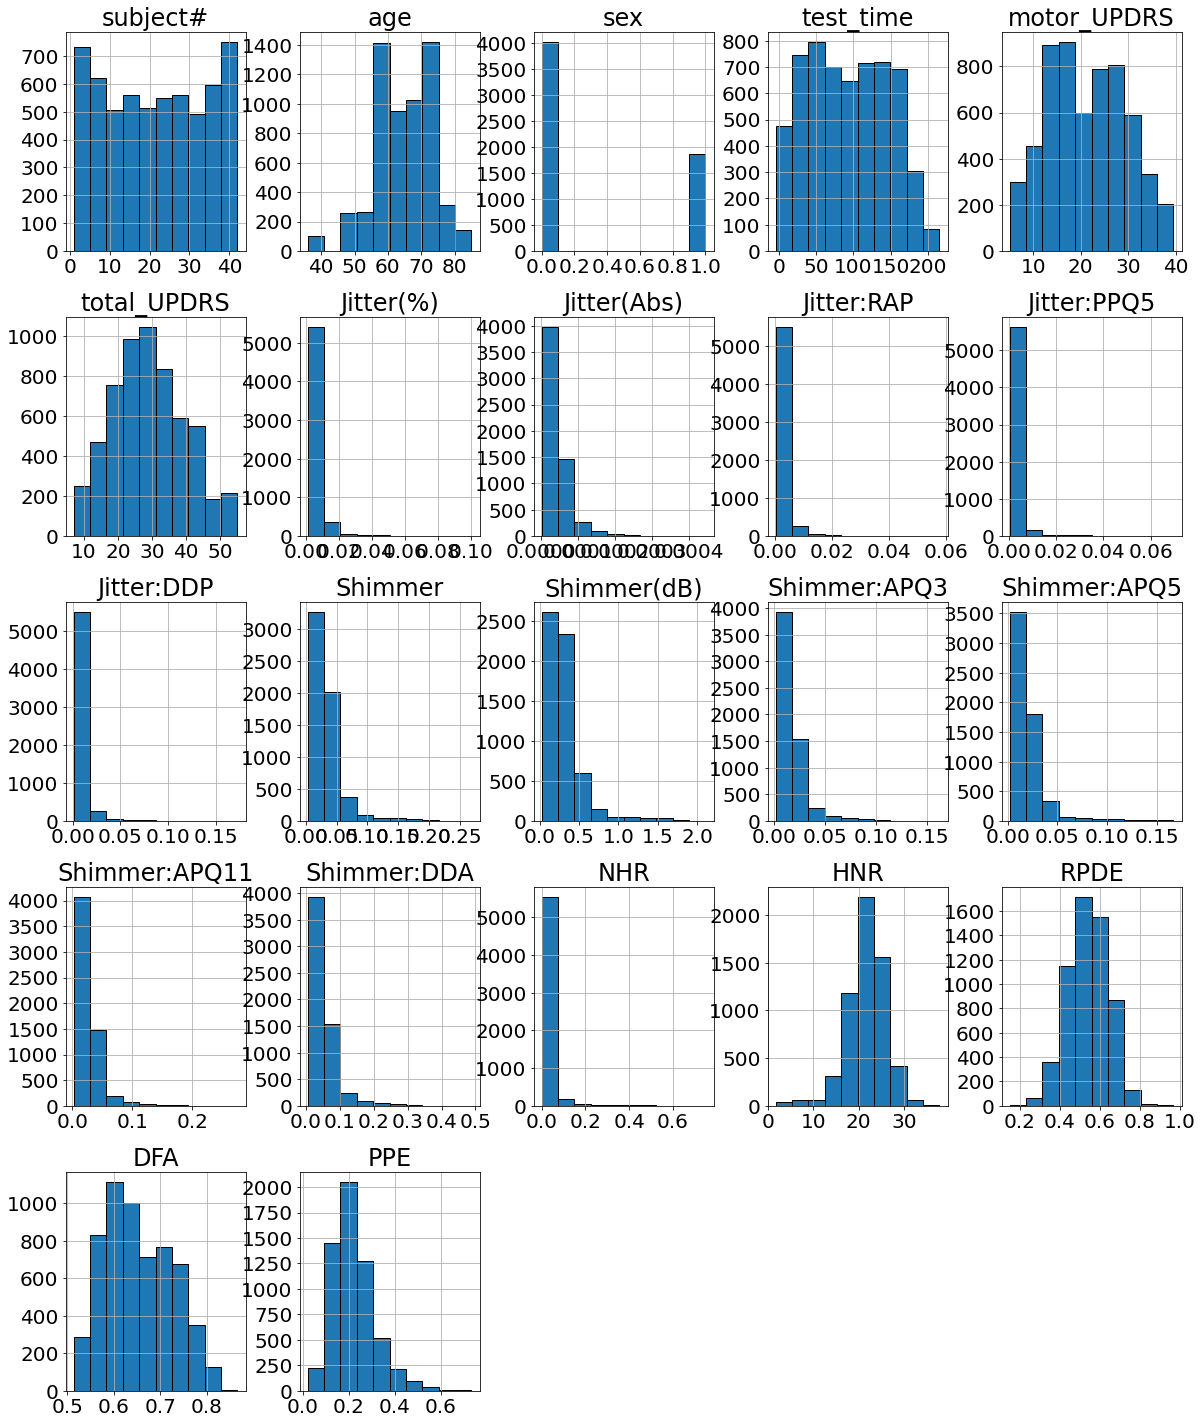

In [8]:
%matplotlib inline

fig= df.hist(xlabelsize=20,ylabelsize=20,ec="k",figsize=(20,25))
[x.title.set_size(24) for x in fig.ravel()]

All the features are highly skewed

In [9]:
df.isna().sum()

subject#         0
age              0
sex              0
test_time        0
motor_UPDRS      0
total_UPDRS      0
Jitter(%)        0
Jitter(Abs)      0
Jitter:RAP       0
Jitter:PPQ5      0
Jitter:DDP       0
Shimmer          0
Shimmer(dB)      0
Shimmer:APQ3     0
Shimmer:APQ5     0
Shimmer:APQ11    0
Shimmer:DDA      0
NHR              0
HNR              0
RPDE             0
DFA              0
PPE              0
dtype: int64

#### Dropping the NaN values

In [10]:
print(df.shape)
df=df.dropna()
df.shape

(5875, 22)


(5875, 22)

In [11]:
df=df.drop(columns=['subject#'])

### Applying log transformation with add 1 to make the dataset distributions more towards normal distribution and rescale the features within range and resuces the skewness from the dataset

### Applying Standard Scalar

In [12]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X2_Scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(X2_Scaled)
df_scaled.columns = df.columns


In [13]:
df_log=np.log1p(df)

after applying log transformation the features have become more normally distributed

#### We will do further all analysis on this dataset with logtransformation

## Correlation

In [14]:
df.corr()

age   sex  test_time  motor_UPDRS  total_UPDRS  Jitter(%)  \
age            1.00 -0.04       0.02         0.27         0.31       0.02   
sex           -0.04  1.00      -0.01        -0.03        -0.10       0.05   
test_time      0.02 -0.01       1.00         0.07         0.08      -0.02   
motor_UPDRS    0.27 -0.03       0.07         1.00         0.95       0.08   
total_UPDRS    0.31 -0.10       0.08         0.95         1.00       0.07   
Jitter(%)      0.02  0.05      -0.02         0.08         0.07       1.00   
Jitter(Abs)    0.04 -0.15      -0.01         0.05         0.07       0.87   
Jitter:RAP     0.01  0.08      -0.03         0.07         0.06       0.98   
Jitter:PPQ5    0.01  0.09      -0.02         0.08         0.06       0.97   
Jitter:DDP     0.01  0.08      -0.03         0.07         0.06       0.98   
Shimmer        0.10  0.06      -0.03         0.10         0.09       0.71   
Shimmer(dB)    0.11  0.06      -0.03         0.11         0.10       0.72   
Shimmer:APQ3   0.10  0.04      -0.03         0.08         0.08       0.66   
Shimmer:APQ5   0.09  0.06      -0.04         0.09         0.08       0.69   
Shimmer:APQ11  0.14  0.02      -0.04         0.14         0.12       0.65   
Shimmer:DDA    0.10  0.04      -0.03         0.08         0.08       0.66   
NHR            0.01  0.17      -0.03         0.07         0.06       0.83   
HNR           -0.10 -0.00       0.04        -0.16        -0.16      -0.68   
RPDE           0.09 -0.16      -0.04         0.13         0.16       0.43   
DFA           -0.09 -0.17       0.02        -0.12        -0.11       0.23   
PPE            0.12 -0.10      -0.00         0.16         0.16       0.72   

               Jitter(Abs)  Jitter:RAP  Jitter:PPQ5  Jitter:DDP  Shimmer  \
age                   0.04        0.01         0.01        0.01     0.10   
sex                  -0.15        0.08         0.09        0.08     0.06   
test_time            -0.01       -0.03        -0.02       -0.03    -0.03   
motor_UPDRS           0.05        0.07         0.08        0.07     0.10   
total_UPDRS           0.07        0.06         0.06        0.06     0.09   
Jitter(%)             0.87        0.98         0.97        0.98     0.71   
Jitter(Abs)           1.00        0.84         0.79        0.84     0.65   
Jitter:RAP            0.84        1.00         0.95        1.00     0.68   
Jitter:PPQ5           0.79        0.95         1.00        0.95     0.73   
Jitter:DDP            0.84        1.00         0.95        1.00     0.68   
Shimmer               0.65        0.68         0.73        0.68     1.00   
Shimmer(dB)           0.66        0.69         0.73        0.69     0.99   
Shimmer:APQ3          0.62        0.65         0.68        0.65     0.98   
Shimmer:APQ5          0.62        0.66         0.73        0.66     0.98   
Shimmer:APQ11         0.59        0.60         0.67        0.60     0.94   
Shimmer:DDA           0.62        0.65         0.68        0.65     0.98   
NHR                   0.70        0.79         0.86        0.79     0.80   
HNR                  -0.71       -0.64        -0.66       -0.64    -0.80   
RPDE                  0.55        0.38         0.38        0.38     0.47   
DFA                   0.35        0.21         0.18        0.21     0.13   
PPE                   0.79        0.67         0.66        0.67     0.62   

               Shimmer(dB)  Shimmer:APQ3  Shimmer:APQ5  Shimmer:APQ11  \
age                   0.11          0.10          0.09           0.14   
sex                   0.06          0.04          0.06           0.02   
test_time            -0.03         -0.03         -0.04          -0.04   
motor_UPDRS           0.11          0.08          0.09           0.14   
total_UPDRS           0.10          0.08          0.08           0.12   
Jitter(%)             0.72          0.66          0.69           0.65   
Jitter(Abs)           0.66          0.62          0.62           0.59   
Jitter:RAP            0.69          0.65          0.66          

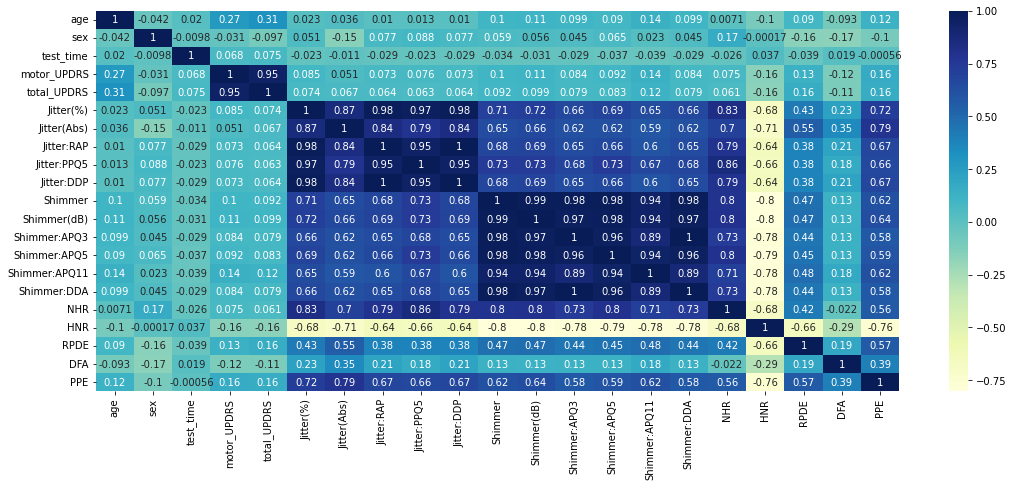

In [15]:
cor=df.corr()
plt.figure(figsize=(18, 7))
dataplot = sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

#### Features are correlated

## Feature Selection

In [16]:
df.isna().sum()

age              0
sex              0
test_time        0
motor_UPDRS      0
total_UPDRS      0
Jitter(%)        0
Jitter(Abs)      0
Jitter:RAP       0
Jitter:PPQ5      0
Jitter:DDP       0
Shimmer          0
Shimmer(dB)      0
Shimmer:APQ3     0
Shimmer:APQ5     0
Shimmer:APQ11    0
Shimmer:DDA      0
NHR              0
HNR              0
RPDE             0
DFA              0
PPE              0
dtype: int64

In [17]:
df['Jitter(Abs)'].value_counts()

0.00    7
0.00    6
0.00    6
0.00    6
0.00    6
       ..
0.00    1
0.00    1
0.00    1
0.00    1
0.00    1
Name: Jitter(Abs), Length: 4105, dtype: int64

In [18]:
df['Jitter(%)'].value_counts()

0.00    22
0.00    21
0.00    21
0.00    20
0.00    19
        ..
0.02     1
0.01     1
0.07     1
0.01     1
0.01     1
Name: Jitter(%), Length: 1305, dtype: int64

In [19]:
df.head()

age  sex  test_time  motor_UPDRS  total_UPDRS  Jitter(%)  Jitter(Abs)  \
0   72    0       5.64        28.20        34.40       0.01         0.00   
1   72    0      12.67        28.45        34.89       0.00         0.00   
2   72    0      19.68        28.70        35.39       0.00         0.00   
3   72    0      25.65        28.91        35.81       0.01         0.00   
4   72    0      33.64        29.19        36.38       0.00         0.00   

   Jitter:RAP  Jitter:PPQ5  Jitter:DDP  Shimmer  Shimmer(dB)  Shimmer:APQ3  \
0        0.00         0.00        0.01     0.03         0.23          0.01   
1        0.00         0.00        0.00     0.02         0.18          0.01   
2        0.00         0.00        0.01     0.02         0.18          0.01   
3        0.00         0.00        0.01     0.02         0.33          0.01   
4        0.00         0.00        0.00     0.02         0.18          0.01   

   Shimmer:APQ5  Shimmer:APQ11  Shimmer:DDA  NHR   HNR  RPDE  DFA  PPE  
0          0.01           0.02         0.04 0.01 21.64  0.42 0.55 0.16  
1          0.01           0.02         0.03 0.01 27.18  0.43 0.56 0.11  
2          0.01           0.01         0.02 0.02 23.05  0.46 0.54 0.21  
3          0.01           0.02         0.03 0.03 24.45  0.49 0.58 0.33  
4          0.01           0.02         0.02 0.01 26.13  0.47 0.56 0.19

### for df_scaled

In [20]:
dfs = pd.DataFrame()

X=df_scaled.drop(columns=['Jitter(%)', 'Jitter(Abs)'])
y=df_scaled['Jitter(%)']


trainX=X
trainy=y
testX=X
testy=y

discrete_features = X.dtypes == int


mi_scores_d = mutual_info_regression(trainX, trainy, discrete_features=discrete_features)
    
mi_scores_d = pd.Series(mi_scores_d, name="MI Scores", index=trainX.columns)


dfs['MI']=mi_scores_d

## Feature selection using random forrest and gradient boosting

clfRF = RandomForestRegressor(max_depth=5, max_features=4, min_samples_split=8,
                  n_estimators=100)#, random_state=0)
clfRF.fit(trainX, trainy)
importance_rf = pd.Series(clfRF.feature_importances_, index=trainX.columns)


clfGB = GradientBoostingRegressor(max_depth=2,n_estimators=50)#, random_state=0)
clfGB.fit(trainX, trainy)
importance_GB = pd.Series(clfGB.feature_importances_, index=trainX.columns)


clfdt = DecisionTreeRegressor(max_depth=5)
clfdt.fit(trainX, trainy)
importance_dt = pd.Series(clfdt.feature_importances_, index=trainX.columns)

cor=df_scaled.corr()


cor_target = abs(cor['Jitter(%)'])

cor_target = pd.Series(cor_target, name="Correlation", index=trainX.columns)

dfs['Decission_Tree']=importance_dt

dfs['Random_Forrest']=importance_rf

dfs['Gradient_Boosting']=importance_GB

# dfs['SVM']=importance_svm

dfs['Correlation_Default']=cor_target

dfs['sum']=dfs.sum(axis=1)

dfs.sort_values('sum',ascending=False)


MI  Decission_Tree  Random_Forrest  Gradient_Boosting  \
Jitter:DDP    1.42            0.65            0.23               0.41   
Jitter:PPQ5   1.48            0.20            0.21               0.27   
Jitter:RAP    1.41            0.14            0.21               0.31   
NHR           0.63            0.00            0.07               0.00   
PPE           0.70            0.00            0.07               0.01   
HNR           0.51            0.00            0.09               0.00   
Shimmer(dB)   0.37            0.00            0.01               0.00   
Shimmer       0.35            0.00            0.02               0.00   
Shimmer:APQ5  0.31            0.00            0.03               0.00   
Shimmer:APQ11 0.33            0.00            0.01               0.00   
Shimmer:DDA   0.28            0.00            0.01               0.00   
Shimmer:APQ3  0.28            0.00            0.01               0.00   
RPDE          0.21            0.00            0.00               0.00   
DFA           0.16            0.00            0.01               0.00   
age           0.18            0.00            0.01               0.00   
motor_UPDRS   0.10            0.00            0.00               0.00   
total_UPDRS   0.08            0.00            0.00               0.00   
sex           0.02            0.00            0.00               0.00   
test_time     0.04            0.00            0.00               0.00   

               Correlation_Default  sum  
Jitter:DDP                    0.98 3.69  
Jitter:PPQ5                   0.97 3.13  
Jitter:RAP                    0.98 3.05  
NHR                           0.83 1.53  
PPE                           0.72 1.51  
HNR                           0.68 1.27  
Shimmer(dB)                   0.72 1.09  
Shimmer                       0.71 1.08  
Shimmer:APQ5                  0.69 1.04  
Shimmer:APQ11                 0.65 0.99  
Shimmer:DDA                   0.66 0.95  
Shimmer:APQ3                  0.66 0.95  
RPDE                          0.43 0.64  
DFA                           0.23 0.40  
age                           0.02 0.21  
motor_UPDRS                   0.08 0.19  
total_UPDRS                   0.07 0.16  
sex                           0.05 0.07  
test_time                     0.02 0.06

#### for df

In [21]:
dfs = pd.DataFrame()


X=df.drop(columns=['Jitter(%)', 'Jitter(Abs)'])
y=df['Jitter(%)']

trainX=X
trainy=y
testX=X
testy=y

discrete_features = X.dtypes == int

mi_scores_d = mutual_info_regression(trainX, trainy, discrete_features=discrete_features)
    
mi_scores_d = pd.Series(mi_scores_d, name="MI Scores", index=trainX.columns)

dfs['MI']=mi_scores_d

## Feature selection using random forrest and gradient boosting

clfRF = RandomForestRegressor(max_depth=5, max_features=4, min_samples_split=8,
                  n_estimators=100)#, random_state=0)
clfRF.fit(trainX, trainy)
importance_rf = pd.Series(clfRF.feature_importances_, index=trainX.columns)


clfGB = GradientBoostingRegressor(max_depth=2,n_estimators=50)#, random_state=0)
clfGB.fit(trainX, trainy)
importance_GB = pd.Series(clfGB.feature_importances_, index=trainX.columns)


clfdt = DecisionTreeRegressor(max_depth=5)
clfdt.fit(trainX, trainy)
importance_dt = pd.Series(clfdt.feature_importances_, index=trainX.columns)

cor=df.corr()


cor_target = abs(cor['Jitter(%)'])

cor_target = pd.Series(cor_target, name="Correlation", index=trainX.columns)

dfs['Decission_Tree']=importance_dt

dfs['Random_Forrest']=importance_rf

dfs['Gradient_Boosting']=importance_GB

dfs['Correlation_Default']=cor_target

dfs['sum']=dfs.sum(axis=1)

dfs.sort_values('sum',ascending=False)


MI  Decission_Tree  Random_Forrest  Gradient_Boosting  \
Jitter:DDP    1.42            0.66            0.21               0.36   
Jitter:PPQ5   1.48            0.22            0.19               0.28   
Jitter:RAP    1.41            0.11            0.19               0.34   
NHR           0.63            0.00            0.08               0.00   
PPE           0.70            0.00            0.07               0.01   
HNR           0.51            0.00            0.07               0.00   
Shimmer(dB)   0.37            0.00            0.05               0.00   
Shimmer       0.35            0.00            0.04               0.00   
Shimmer:APQ5  0.31            0.00            0.02               0.00   
Shimmer:APQ11 0.33            0.00            0.01               0.00   
Shimmer:APQ3  0.28            0.00            0.02               0.00   
Shimmer:DDA   0.28            0.00            0.01               0.00   
RPDE          0.21            0.00            0.01               0.00   
DFA           0.16            0.00            0.01               0.00   
age           0.20            0.00            0.01               0.00   
motor_UPDRS   0.10            0.00            0.00               0.00   
total_UPDRS   0.08            0.00            0.00               0.00   
sex           0.03            0.00            0.00               0.00   
test_time     0.04            0.00            0.00               0.00   

               Correlation_Default  sum  
Jitter:DDP                    0.98 3.64  
Jitter:PPQ5                   0.97 3.15  
Jitter:RAP                    0.98 3.04  
NHR                           0.83 1.54  
PPE                           0.72 1.50  
HNR                           0.68 1.26  
Shimmer(dB)                   0.72 1.13  
Shimmer                       0.71 1.09  
Shimmer:APQ5                  0.69 1.03  
Shimmer:APQ11                 0.65 0.99  
Shimmer:APQ3                  0.66 0.97  
Shimmer:DDA                   0.66 0.96  
RPDE                          0.43 0.65  
DFA                           0.23 0.40  
age                           0.02 0.23  
motor_UPDRS                   0.08 0.19  
total_UPDRS                   0.07 0.16  
sex                           0.05 0.08  
test_time                     0.02 0.06

In [22]:
dfs.shape

(19, 6)

In [23]:
dfs_s=dfs[dfs['sum']>1.51]
dfs_s.shape

(4, 6)

In [24]:
dfs_s

MI  Decission_Tree  Random_Forrest  Gradient_Boosting  \
Jitter:RAP  1.41            0.11            0.19               0.34   
Jitter:PPQ5 1.48            0.22            0.19               0.28   
Jitter:DDP  1.42            0.66            0.21               0.36   
NHR         0.63            0.00            0.08               0.00   

             Correlation_Default  sum  
Jitter:RAP                  0.98 3.04  
Jitter:PPQ5                 0.97 3.15  
Jitter:DDP                  0.98 3.64  
NHR                         0.83 1.54

In [25]:
dfs_s.index

Index(['Jitter:RAP', 'Jitter:PPQ5', 'Jitter:DDP', 'NHR'], dtype='object')

### chosing the best top 4 features

In [26]:

df_ts=df_scaled[dfs_s.index] # scaled dataset

df_t=df[dfs_s.index] 

In [27]:
df_t.head()

Jitter:RAP  Jitter:PPQ5  Jitter:DDP  NHR
0        0.00         0.00        0.01 0.01
1        0.00         0.00        0.00 0.01
2        0.00         0.00        0.01 0.02
3        0.00         0.00        0.01 0.03
4        0.00         0.00        0.00 0.01

## Making X,y

## Making train and test split

In [28]:
df.columns

Index(['age', 'sex', 'test_time', 'motor_UPDRS', 'total_UPDRS', 'Jitter(%)',
       'Jitter(Abs)', 'Jitter:RAP', 'Jitter:PPQ5', 'Jitter:DDP', 'Shimmer',
       'Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5', 'Shimmer:APQ11',
       'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'PPE'],
      dtype='object')

In [29]:
X.shape

(5875, 19)

#### for df

In [30]:
# df_r=df.sample(frac =.5)
# print(df.shape)

X=df_t
y=df['Jitter(%)']

# reduce X,y

reduce= int(X.shape[0] * 0.3)

X,y = X[:reduce], y[:reduce]


offset = int(X.shape[0] * 0.7)

### splitting dataset into training and testing part.
X_train, y_train = X[:offset], y[:offset]
X_test, y_test = X[offset:], y[offset:]


# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 64)

In [31]:
X.shape

(1762, 4)

In [32]:
y_train.shape

(1233,)

In [33]:
X_train.shape

(1233, 4)

#### for df_scaled

In [34]:
Xs=df_ts
ys=df_scaled['Jitter(%)']
# ys=df_log['SSPL']

# reduce Xs,ys

reduce= int(Xs.shape[0] * 0.3)

Xs,ys = Xs[:reduce], ys[:reduce]


offset = int(Xs.shape[0] * 0.7)

### splitting dataset into training and testing part.
Xs_train, ys_train = Xs[:offset], ys[:offset]
Xs_test, ys_test = Xs[offset:], ys[offset:]

In [35]:
Xs_train.shape

(1233, 4)

In [36]:
df_t.describe()

Jitter:RAP  Jitter:PPQ5  Jitter:DDP     NHR
count     5875.00      5875.00     5875.00 5875.00
mean         0.00         0.00        0.01    0.03
std          0.00         0.00        0.01    0.06
min          0.00         0.00        0.00    0.00
25%          0.00         0.00        0.00    0.01
50%          0.00         0.00        0.01    0.02
75%          0.00         0.00        0.01    0.03
max          0.06         0.07        0.17    0.75

In [37]:
df_ts.describe()

Jitter:RAP  Jitter:PPQ5  Jitter:DDP     NHR
count     5875.00      5875.00     5875.00 5875.00
mean         0.00        -0.00        0.00   -0.00
std          1.00         1.00        1.00    1.00
min         -0.85        -0.76       -0.85   -0.53
25%         -0.45        -0.39       -0.45   -0.35
50%         -0.24        -0.21       -0.24   -0.23
75%          0.10         0.05        0.10   -0.01
max         17.46        17.76       17.47   12.00

In [38]:
X.describe()

Jitter:RAP  Jitter:PPQ5  Jitter:DDP     NHR
count     1762.00      1762.00     1762.00 1762.00
mean         0.00         0.00        0.01    0.03
std          0.00         0.00        0.01    0.04
min          0.00         0.00        0.00    0.00
25%          0.00         0.00        0.00    0.01
50%          0.00         0.00        0.01    0.02
75%          0.00         0.00        0.01    0.03
max          0.04         0.05        0.13    0.73

In [39]:
Xs.describe()

Jitter:RAP  Jitter:PPQ5  Jitter:DDP     NHR
count     1762.00      1762.00     1762.00 1762.00
mean        -0.08        -0.08       -0.08   -0.10
std          0.79         0.66        0.79    0.62
min         -0.78        -0.67       -0.78   -0.52
25%         -0.48        -0.39       -0.48   -0.35
50%         -0.30        -0.25       -0.30   -0.21
75%          0.04         0.02        0.04   -0.03
max         12.99        11.84       12.99   11.61

In [40]:
X_train.shape

(1233, 4)

In [41]:
X_test.shape

(529, 4)

In [42]:
X.shape

(1762, 4)

In [43]:
X_train.shape

(1233, 4)

## Using Lazy predict to rub regression models

### Making prediction on train-test dataset with lazy predict for df

In [ ]:
reg = LazyRegressor(verbose=10, ignore_warnings=False, custom_metric=None)

models_1, predictions = reg.fit(X_train, X_test, y_train, y_test)

print(models_1)


 17%|█▋        | 7/42 [00:00<00:01, 17.99it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': 0.9390060590611293, 'Adjusted R-Squared': 0.9385404564585426, 'RMSE': 0.0009094468447416353, 'Time taken': 0.08128118515014648}
{'Model': 'BaggingRegressor', 'R-Squared': 0.9671045402314196, 'Adjusted R-Squared': 0.9668534298515068, 'RMSE': 0.0006678854055403796, 'Time taken': 0.05931401252746582}
{'Model': 'BayesianRidge', 'R-Squared': 0.9635660318767071, 'Adjusted R-Squared': 0.9632879099826361, 'RMSE': 0.0007028897498566879, 'Time taken': 0.012372255325317383}
{'Model': 'DecisionTreeRegressor', 'R-Squared': 0.9481507479218056, 'Adjusted R-Squared': 0.9477549521044148, 'RMSE': 0.0008385041591743842, 'Time taken': 0.013714313507080078}
{'Model': 'DummyRegressor', 'R-Squared': -0.00389427645881546, 'Adjusted R-Squared': -0.011557591546287327, 'RMSE': 0.00368958875667849, 'Time taken': 0.008709907531738281}
{'Model': 'ElasticNet', 'R-Squared': -0.00389427645881546, 'Adjusted R-Squared': -0.011557591546287327, 'RMSE': 0.00368958875667849, 'Time

 26%|██▌       | 11/42 [00:00<00:02, 12.75it/s]

{'Model': 'ExtraTreesRegressor', 'R-Squared': 0.9679105005793098, 'Adjusted R-Squared': 0.9676655425684648, 'RMSE': 0.0006596528517631975, 'Time taken': 0.1957085132598877}
{'Model': 'GammaRegressor', 'R-Squared': 0.6398199529592863, 'Adjusted R-Squared': 0.6370704869513419, 'RMSE': 0.002210007758478012, 'Time taken': 0.01001119613647461}
{'Model': 'GaussianProcessRegressor', 'R-Squared': -12127.390332308953, 'Adjusted R-Squared': -12219.973464616653, 'RMSE': 0.40554173596977705, 'Time taken': 0.18294882774353027}
{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.9671324573259492, 'Adjusted R-Squared': 0.9668815600536282, 'RMSE': 0.0006676019412306781, 'Time taken': 0.15507864952087402}



 31%|███       | 13/42 [00:03<00:13,  2.18it/s]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.8451467552195748, 'Adjusted R-Squared': 0.8439646693815563, 'RMSE': 0.001449085891344719, 'Time taken': 2.535094738006592}
{'Model': 'HuberRegressor', 'R-Squared': 0.9662770791883908, 'Adjusted R-Squared': 0.9660196523119663, 'RMSE': 0.0006762333177220177, 'Time taken': 0.027383804321289062}
{'Model': 'KNeighborsRegressor', 'R-Squared': 0.9595130297430046, 'Adjusted R-Squared': 0.9592039689013481, 'RMSE': 0.0007409546236128822, 'Time taken': 0.01673102378845215}


 48%|████▊     | 20/42 [00:03<00:05,  3.92it/s]

{'Model': 'KernelRidge', 'R-Squared': -1.4682187611584139, 'Adjusted R-Squared': -1.487060125747409, 'RMSE': 0.005785298843601971, 'Time taken': 0.21108174324035645}
{'Model': 'Lars', 'R-Squared': 0.9635759764740291, 'Adjusted R-Squared': 0.9632979304929149, 'RMSE': 0.0007027938169550055, 'Time taken': 0.02817535400390625}
{'Model': 'LarsCV', 'R-Squared': 0.9372877300636557, 'Adjusted R-Squared': 0.9368090104458211, 'RMSE': 0.0009221683943850178, 'Time taken': 0.04581570625305176}
{'Model': 'Lasso', 'R-Squared': -0.00389427645881546, 'Adjusted R-Squared': -0.011557591546287327, 'RMSE': 0.00368958875667849, 'Time taken': 0.010560750961303711}
{'Model': 'LassoCV', 'R-Squared': 0.9597552993595584, 'Adjusted R-Squared': 0.9594480879042878, 'RMSE': 0.0007387344013890013, 'Time taken': 0.06622314453125}
{'Model': 'LassoLars', 'R-Squared': -0.00389427645881546, 'Adjusted R-Squared': -0.011557591546287327, 'RMSE': 0.00368958875667849, 'Time taken': 0.01407003402709961}
{'Model': 'LassoLarsCV',


 60%|█████▉    | 25/42 [00:03<00:03,  5.37it/s]

{'Model': 'LassoLarsIC', 'R-Squared': 0.9634337183045971, 'Adjusted R-Squared': 0.9631545863832581, 'RMSE': 0.0007041649001490612, 'Time taken': 0.011341094970703125}
{'Model': 'LinearRegression', 'R-Squared': 0.9636005774623065, 'Adjusted R-Squared': 0.9633227192749959, 'RMSE': 0.0007025564414386879, 'Time taken': 0.01220560073852539}
{'Model': 'LinearSVR', 'R-Squared': 0.9549470754611226, 'Adjusted R-Squared': 0.9546031600066274, 'RMSE': 0.0007816196462613674, 'Time taken': 0.06923198699951172}
{'Model': 'MLPRegressor', 'R-Squared': -11.507609988635402, 'Adjusted R-Squared': -11.603087927479946, 'RMSE': 0.013023302803676653, 'Time taken': 0.18365907669067383}



 67%|██████▋   | 28/42 [00:04<00:02,  5.31it/s]

{'Model': 'NuSVR', 'R-Squared': 0.9702160472592573, 'Adjusted R-Squared': 0.969988688841389, 'RMSE': 0.0006355140261927593, 'Time taken': 0.38524580001831055}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.9632702244715093, 'Adjusted R-Squared': 0.962989844505643, 'RMSE': 0.0007057373627118153, 'Time taken': 0.009875774383544922}
{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.9632702244715093, 'Adjusted R-Squared': 0.962989844505643, 'RMSE': 0.0007057373627118153, 'Time taken': 0.012923002243041992}
{'Model': 'PassiveAggressiveRegressor', 'R-Squared': -2.531292528128748, 'Adjusted R-Squared': -2.5582489596411806, 'RMSE': 0.006919915971385758, 'Time taken': 0.009235858917236328}
{'Model': 'PoissonRegressor', 'R-Squared': 0.0302212453214028, 'Adjusted R-Squared': 0.022818354064314317, 'RMSE': 0.0036263549085912518, 'Time taken': 0.008191823959350586}



 67%|██████▋   | 28/42 [00:20<00:02,  5.31it/s]

### Lazy predict for df_scaled

In [93]:
reg = LazyRegressor(verbose=10, ignore_warnings=False, custom_metric=None)

models_1, predictions = reg.fit(Xs_train, Xs_test, ys_train, ys_test)

print(models_1)

 17%|█▋        | 7/42 [00:00<00:02, 12.18it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': 0.9475409972876977, 'Adjusted R-Squared': 0.9471405468853137, 'RMSE': 0.14997470385369505, 'Time taken': 0.10625529289245605}
{'Model': 'BaggingRegressor', 'R-Squared': 0.9676493309680063, 'Adjusted R-Squared': 0.9674023792960064, 'RMSE': 0.11777405583651376, 'Time taken': 0.05866360664367676}
{'Model': 'BayesianRidge', 'R-Squared': 0.963564744259999, 'Adjusted R-Squared': 0.9632866125367929, 'RMSE': 0.12498816990666285, 'Time taken': 0.0077898502349853516}
{'Model': 'DecisionTreeRegressor', 'R-Squared': 0.9487494618013721, 'Adjusted R-Squared': 0.9483582363189398, 'RMSE': 0.14823720343629934, 'Time taken': 0.014251947402954102}
{'Model': 'DummyRegressor', 'R-Squared': -0.00389427645881546, 'Adjusted R-Squared': -0.011557591546287327, 'RMSE': 0.65607273096907, 'Time taken': 0.00783538818359375}
{'Model': 'ElasticNet', 'R-Squared': 0.4557837558731418, 'Adjusted R-Squared': 0.45162943339889106, 'RMSE': 0.48305184851775695, 'Time taken': 0.00781


 21%|██▏       | 9/42 [00:00<00:03, 10.90it/s]

{'Model': 'ExtraTreesRegressor', 'R-Squared': 0.9673232023226944, 'Adjusted R-Squared': 0.9670737611190509, 'RMSE': 0.11836621014620002, 'Time taken': 0.2145376205444336}
GammaRegressor model failed to execute
Some value(s) of y are out of the valid range for family GammaDistribution



 26%|██▌       | 11/42 [00:00<00:03,  9.99it/s]

{'Model': 'GaussianProcessRegressor', 'R-Squared': -12129.22911151392, 'Adjusted R-Squared': -12221.826280304102, 'RMSE': 72.11780499249181, 'Time taken': 0.2307898998260498}
{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.9661859050401755, 'Adjusted R-Squared': 0.9659277821778868, 'RMSE': 0.12040842675625875, 'Time taken': 0.1725759506225586}



 31%|███       | 13/42 [00:03<00:14,  1.97it/s]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.845151292401878, 'Adjusted R-Squared': 0.843969241198839, 'RMSE': 0.2576687736637043, 'Time taken': 2.727600574493408}
{'Model': 'HuberRegressor', 'R-Squared': 0.9662770964257356, 'Adjusted R-Squared': 0.9660196696808938, 'RMSE': 0.1202459556881396, 'Time taken': 0.019681692123413086}
{'Model': 'KNeighborsRegressor', 'R-Squared': 0.9595130297430046, 'Adjusted R-Squared': 0.9592039689013481, 'RMSE': 0.1317545546391699, 'Time taken': 0.012974023818969727}


 48%|████▊     | 20/42 [00:04<00:06,  3.64it/s]

{'Model': 'KernelRidge', 'R-Squared': 0.9520985723944025, 'Adjusted R-Squared': 0.951732912641688, 'RMSE': 0.1433118909656075, 'Time taken': 0.18445158004760742}
{'Model': 'Lars', 'R-Squared': 0.9635759764740291, 'Adjusted R-Squared': 0.9632979304929149, 'RMSE': 0.12496890282507601, 'Time taken': 0.031563758850097656}
{'Model': 'LarsCV', 'R-Squared': 0.9372877300705788, 'Adjusted R-Squared': 0.9368090104527969, 'RMSE': 0.1639774990611147, 'Time taken': 0.029186010360717773}
{'Model': 'Lasso', 'R-Squared': -0.00389427645881546, 'Adjusted R-Squared': -0.011557591546287327, 'RMSE': 0.65607273096907, 'Time taken': 0.011099815368652344}
{'Model': 'LassoCV', 'R-Squared': 0.9597552993595584, 'Adjusted R-Squared': 0.9594480879042878, 'RMSE': 0.13135976070579652, 'Time taken': 0.06071281433105469}
{'Model': 'LassoLars', 'R-Squared': -0.00389427645881546, 'Adjusted R-Squared': -0.011557591546287327, 'RMSE': 0.65607273096907, 'Time taken': 0.01358652114868164}
{'Model': 'LassoLarsCV', 'R-Squared'


 60%|█████▉    | 25/42 [00:04<00:03,  5.03it/s]

{'Model': 'LinearRegression', 'R-Squared': 0.9636005774623069, 'Adjusted R-Squared': 0.9633227192749962, 'RMSE': 0.12492669335038174, 'Time taken': 0.010169506072998047}
{'Model': 'LinearSVR', 'R-Squared': 0.9649615821855104, 'Adjusted R-Squared': 0.9646941133472319, 'RMSE': 0.12256888674020677, 'Time taken': 0.0469355583190918}



 67%|██████▋   | 28/42 [00:04<00:02,  5.50it/s]

{'Model': 'MLPRegressor', 'R-Squared': 0.9728775740279696, 'Adjusted R-Squared': 0.9726705326083358, 'RMSE': 0.10783810914842774, 'Time taken': 0.24954628944396973}
{'Model': 'NuSVR', 'R-Squared': 0.973365120588329, 'Adjusted R-Squared': 0.9731618008981636, 'RMSE': 0.1068644771987602, 'Time taken': 0.16378235816955566}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.9632702244715093, 'Adjusted R-Squared': 0.962989844505643, 'RMSE': 0.12549231620005089, 'Time taken': 0.010364770889282227}
{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.9632702244715093, 'Adjusted R-Squared': 0.962989844505643, 'RMSE': 0.12549231620005089, 'Time taken': 0.014483928680419922}
{'Model': 'PassiveAggressiveRegressor', 'R-Squared': 0.9491664628223957, 'Adjusted R-Squared': 0.9487784205538644, 'RMSE': 0.14763290422892855, 'Time taken': 0.009032249450683594}
PoissonRegressor model failed to execute
Some value(s) of y are out of the valid range for family PoissonDistribution


 76%|███████▌  | 32/42 [01:21<00:59,  5.91s/it]

{'Model': 'QuantileRegressor', 'R-Squared': -0.09229963686442333, 'Adjusted R-Squared': -0.10063780203132722, 'RMSE': 0.684350978643631, 'Time taken': 77.07645583152771}
{'Model': 'RANSACRegressor', 'R-Squared': 0.970506149370639, 'Adjusted R-Squared': 0.9702810054727049, 'RMSE': 0.1124536966040147, 'Time taken': 0.03360414505004883}



 81%|████████  | 34/42 [01:22<00:33,  4.20s/it]

{'Model': 'RandomForestRegressor', 'R-Squared': 0.9672662913509888, 'Adjusted R-Squared': 0.9670164157124468, 'RMSE': 0.11846924052266189, 'Time taken': 0.3828721046447754}
{'Model': 'Ridge', 'R-Squared': 0.9635392429296772, 'Adjusted R-Squared': 0.9632609165398274, 'RMSE': 0.1250319023715777, 'Time taken': 0.007208824157714844}
{'Model': 'RidgeCV', 'R-Squared': 0.9635392429293929, 'Adjusted R-Squared': 0.9632609165395409, 'RMSE': 0.12503190237206535, 'Time taken': 0.008752822875976562}
{'Model': 'SGDRegressor', 'R-Squared': 0.9665258483844559, 'Adjusted R-Squared': 0.9662703205095281, 'RMSE': 0.11980164666543247, 'Time taken': 0.008362770080566406}
{'Model': 'SVR', 'R-Squared': 0.9751658365327047, 'Adjusted R-Squared': 0.9749762627657788, 'RMSE': 0.10318884841106907, 'Time taken': 0.035687923431396484}
{'Model': 'TransformedTargetRegressor', 'R-Squared': 0.9636005774623069, 'Adjusted R-Squared': 0.9633227192749962, 'RMSE': 0.12492669335038174, 'Time taken': 0.0066258907318115234}
{'Mo


 98%|█████████▊| 41/42 [01:22<00:02,  2.97s/it]

{'Model': 'XGBRegressor', 'R-Squared': 0.9636753597180774, 'Adjusted R-Squared': 0.963398072387681, 'RMSE': 0.12479829703755092, 'Time taken': 0.6145944595336914}


100%|██████████| 42/42 [01:23<00:00,  1.99s/it]

{'Model': 'LGBMRegressor', 'R-Squared': 0.8443995683104377, 'Adjusted R-Squared': 0.8432117787555555, 'RMSE': 0.2582934521615193, 'Time taken': 0.6165671348571777}
                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
SVR                                          0.97       0.98  0.10        0.04
NuSVR                                        0.97       0.97  0.11        0.16
MLPRegressor                                 0.97       0.97  0.11        0.25
RANSACRegressor                              0.97       0.97  0.11        0.03
BaggingRegressor                             0.97       0.97  0.12        0.06
ExtraTreesRegressor                          0.97       0.97  0.12        0.21
RandomForestRegressor                        0.97       0.97  0.12        0.38
SGDRegressor                                 0.97       0.97  0.12        0.01
HuberRegressor                               0

### Making a datframe to store results

In [44]:
df_results_r1=pd.DataFrame(columns=['model_name','sampling/VI_method','RMSE','MSE','R2','Adj_R2','model_details'])

df_results_r1

Empty DataFrame
Columns: [model_name, sampling/VI_method, RMSE, MSE, R2, Adj_R2, model_details]
Index: []

## Linear Regression (ML)

### Making prediction on full dataset (no scaling) with Linear Regression on df

In [45]:
from sklearn.linear_model import LinearRegression


# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 64)

reg = LinearRegression()
reg.fit(X_train, y_train)

y_p=reg.predict(X_test)

p= len(X.columns)
print(p)
n= len(X.index)
print(n)

rmse = mean_squared_error(y_test, y_p, squared=False)
print(rmse)
mse = mean_squared_error(y_test, y_p)
print(mse)
r2= r2_score(y_test, y_p)
print(r2)
Adj_r2 = 1-(1-r2)*((n-1)/(n-p-1))
print(Adj_r2)

df_results_r1= df_results_r1.append({'model_name':'Linear Regression-tain/test dataste','sampling/VI_method':'NA','RMSE':rmse,'MSE':mse,'R2':r2,
                                  'Adj_R2':Adj_r2,'model_details':reg},ignore_index=True)


4
1762
0.0007025564414386834
4.935855534069861e-07
0.9636005774623071
0.9635177102510659


In [46]:
df_results_r1

model_name sampling/VI_method  RMSE  MSE   R2  \
0  Linear Regression-tain/test dataste                 NA  0.00 0.00 0.96   

   Adj_R2       model_details  
0    0.96  LinearRegression()

### LR on train test split on df_scaled

In [47]:
from sklearn.linear_model import LinearRegression


# Xs_train, Xs_test, ys_train, ys_test = train_test_split(X, y, test_size = 0.2, random_state = 64)

reg = LinearRegression()
reg.fit(Xs_train, ys_train)

ys_p=reg.predict(Xs_test)

p= len(X.columns)
print(p)
n= len(X.index)
print(n)

rmse = mean_squared_error(ys_test, ys_p, squared=False)
print(rmse)
mse = mean_squared_error(ys_test, ys_p)
print(mse)
r2= r2_score(ys_test, ys_p)
print(r2)
Adj_r2 = 1-(1-r2)*((n-1)/(n-p-1))
print(Adj_r2)

df_results_r1= df_results_r1.append({'model_name':'Linear Regression-tain/test dataste','sampling/VI_method':'NA','RMSE':rmse,'MSE':mse,'R2':r2,
                                  'Adj_R2':Adj_r2,'model_details':reg},ignore_index=True)


4
1762
0.12492669335038237
0.01560667871146047
0.9636005774623064
0.9635177102510653


#### We can see that using scaled df_scaled and and normal df does not effect our LR results



array([[<AxesSubplot:title={'center':'Jitter:RAP'}>,
        <AxesSubplot:title={'center':'Jitter:PPQ5'}>],
       [<AxesSubplot:title={'center':'Jitter:DDP'}>,
        <AxesSubplot:title={'center':'NHR'}>]], dtype=object)

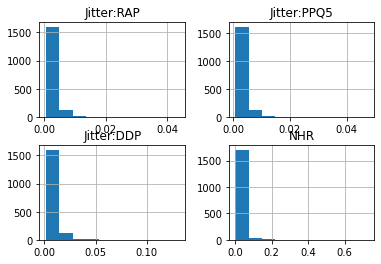

In [48]:
X.hist()

array([[<AxesSubplot:title={'center':'Jitter:RAP'}>,
        <AxesSubplot:title={'center':'Jitter:PPQ5'}>],
       [<AxesSubplot:title={'center':'Jitter:DDP'}>,
        <AxesSubplot:title={'center':'NHR'}>]], dtype=object)

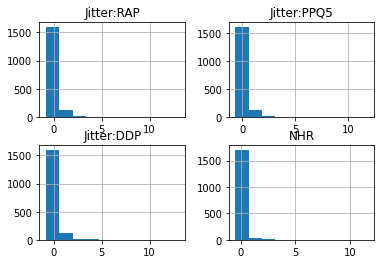

In [49]:
Xs.hist()

In [50]:
X.columns

Index(['Jitter:RAP', 'Jitter:PPQ5', 'Jitter:DDP', 'NHR'], dtype='object')

#### Also the distributions look nearly same before and after standard scaling

#### Making variables for pymc models

In [51]:
Xv=X.values
yv=y.values
Xv_train=X_train.values
Xv_test=X_test.values
print(Xv_train.shape,Xv_test.shape)
yv_train=y_train.values
yv_test=y_test.values
print(yv_train.shape,yv_test.shape)


(1233, 4) (529, 4)
(1233,) (529,)


### making vars for prior for each feature for df

In [52]:
X.columns

Index(['Jitter:RAP', 'Jitter:PPQ5', 'Jitter:DDP', 'NHR'], dtype='object')

In [53]:
X_Jitter_RAP_v=X['Jitter:RAP'].values
print(X_Jitter_RAP_v.shape)

X_Jitter_PPQ5_v= X['Jitter:PPQ5'].values

X_Jitter_DDP_v=X['Jitter:DDP'].values

X_NHR_v =X['NHR'].values



X_Jitter_RAP=X['Jitter:RAP']
print(X_Jitter_RAP.shape)

X_Jitter_PPQ5= X['Jitter:PPQ5']

X_Jitter_DDP=X['Jitter:DDP']

X_NHR =X['NHR']


X_Jitter_RAP_test_v=X_test['Jitter:RAP'].values
print(X_Jitter_RAP_test_v.shape)

X_Jitter_PPQ5_test_v= X_test['Jitter:PPQ5'].values

X_Jitter_DDP_test_v=X_test['Jitter:DDP'].values

X_NHR_test_v=X_test['NHR'].values



X_Jitter_RAP_test=X_test['Jitter:RAP']
print(X_Jitter_RAP_test.shape)

X_Jitter_PPQ5_test= X_test['Jitter:PPQ5']

X_Jitter_DDP_test=X_test['Jitter:DDP']

X_NHR_test=X_test['NHR']


X_Jitter_RAP_train_v=X_train['Jitter:RAP'].values
print(X_Jitter_RAP_train_v.shape)

X_Jitter_PPQ5_train_v= X_train['Jitter:PPQ5'].values

X_Jitter_DDP_train_v=X_train['Jitter:DDP'].values

X_NHR_train_v=X_train['NHR'].values



X_Jitter_RAP_train=X_train['Jitter:RAP']
print(X_Jitter_RAP_train.shape)

X_Jitter_PPQ5_train= X_train['Jitter:PPQ5']

X_Jitter_DDP_train=X_train['Jitter:DDP']

X_NHR_train=X_train['NHR']

Xsv=Xs.values
yv=y.values
Xsv_train=Xs_train.values
Xsv_test=Xs_test.values
print(Xsv_train.shape,Xsv_test.shape)

yv_train=y_train.values
yv_test=y_test.values

ysv_train=ys_train.values
ysv_test=ys_test.values


print(yv_train.shape,yv_test.shape)

Xs.columns
Xs_Jitter_RAP_v=Xs['Jitter:RAP'].values
print(Xs_Jitter_RAP_v.shape)

Xs_Jitter_PPQ5_v= Xs['Jitter:PPQ5'].values

Xs_Jitter_DDP_v=Xs['Jitter:DDP'].values

Xs_NHR_v =Xs['NHR'].values



Xs_Jitter_RAP=Xs['Jitter:RAP']
print(Xs_Jitter_RAP.shape)

Xs_Jitter_PPQ5= Xs['Jitter:PPQ5']

Xs_Jitter_DDP=Xs['Jitter:DDP']

Xs_NHR =Xs['NHR']


Xs_Jitter_RAP_test_v=Xs_test['Jitter:RAP'].values
print(Xs_Jitter_RAP_test_v.shape)

Xs_Jitter_PPQ5_test_v= Xs_test['Jitter:PPQ5'].values

Xs_Jitter_DDP_test_v=Xs_test['Jitter:DDP'].values

Xs_NHR_test_v=Xs_test['NHR'].values



Xs_Jitter_RAP_test=Xs_test['Jitter:RAP']
print(Xs_Jitter_RAP_test.shape)

Xs_Jitter_PPQ5_test= Xs_test['Jitter:PPQ5']

Xs_Jitter_DDP_test=Xs_test['Jitter:DDP']

Xs_NHR_test=Xs_test['NHR']


Xs_Jitter_RAP_train_v=Xs_train['Jitter:RAP'].values
print(Xs_Jitter_RAP_train_v.shape)

Xs_Jitter_PPQ5_train_v= Xs_train['Jitter:PPQ5'].values

Xs_Jitter_DDP_train_v=Xs_train['Jitter:DDP'].values

Xs_NHR_train_v=Xs_train['NHR'].values



Xs_Jitter_RAP_train=Xs_train['Jitter:RAP']
print(Xs_Jitter_RAP_train.shape)

Xs_Jitter_PPQ5_train= Xs_train['Jitter:PPQ5']

Xs_Jitter_DDP_train=Xs_train['Jitter:DDP']

Xs_NHR_train=Xs_train['NHR']


(1762,)
(1762,)
(529,)
(529,)
(1233,)
(1233,)
(1233, 4) (529, 4)
(1233,) (529,)
(1762,)
(1762,)
(529,)
(529,)
(1233,)
(1233,)


### making vars for prior for each feature for df_scaled

### Selection of priors



## Applying MCMC

#### Note: We have used slice as the starting  sampling method to chose our best prior as it is the fastest sampler and as NUTS was giving chain breaking error

### Doing Multiple Linear Regression using MCMC

### MLR of df_scaled (general and specified priors are same as df_scaled is standard scalar)

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Slice: [ϵ]
>Slice: [NHR]
>Slice: [Jitter:DDP]
>Slice: [Jitter:PPQ5]
>Slice: [Jitter:RAP]
>Slice: [α]


Sampling 4 chains for 1_000 tune and 10_000 draw iterations (4_000 + 40_000 draws total) took 39 seconds.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.


4
1762
Root mean square error :  0.12508027625121296
Mean square error :  0.01564507550707975
R2-score :  0.963511024700077
Adjusted R2-score :  0.9634279536123139


mean   sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_mean  \
α           -0.00 0.00   -0.01     0.00       0.00     0.00  38133.00   
Jitter:RAP  -0.13 0.42   -0.78     0.54       0.20     0.15      4.00   
Jitter:PPQ5  0.42 0.02    0.37     0.46       0.00     0.00    695.00   
Jitter:DDP   0.70 0.42    0.03     1.35       0.20     0.15      4.00   
NHR          0.00 0.01   -0.02     0.02       0.00     0.00   1558.00   
ϵ            0.11 0.00    0.11     0.12       0.00     0.00  36975.00   

              ess_sd  ess_bulk  ess_tail  r_hat  
α           31062.00  38164.00  28747.00   1.00  
Jitter:RAP      4.00      5.00     22.00   2.33  
Jitter:PPQ5   695.00    694.00   1629.00   1.00  
Jitter:DDP      4.00      5.00     21.00   2.34  
NHR          1558.00   1558.00   4391.00   1.00  
ϵ           36966.00  36968.00  29803.00   1.00

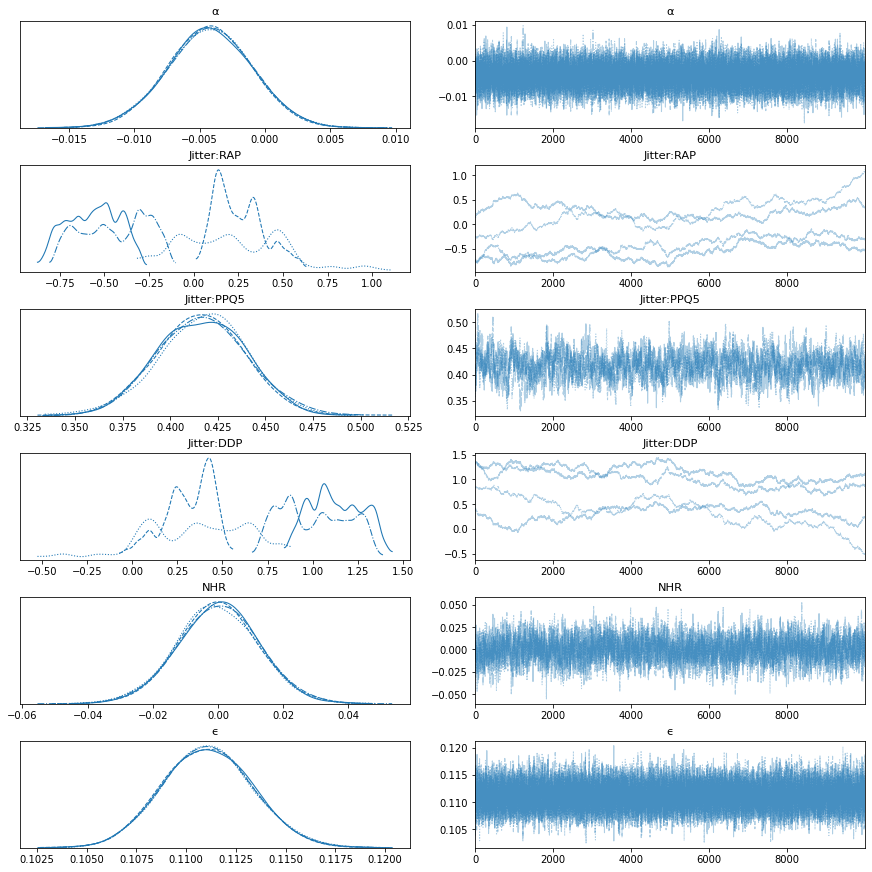

In [54]:
with pm.Model() as model_mlr:

    # Priors
    α = pm.Normal('α', mu=0, sd=1) # Try changing the prior distribution
    
    β_Jitter_RAP = pm.Normal('Jitter:RAP', mu=0, sd=1)
    β_Jitter_PPQ5 = pm.Normal('Jitter:PPQ5', mu=0, sd=1)
    β_Jitter_DDP = pm.Normal('Jitter:DDP', mu=0, sd=1)
    NHR = pm.Normal('NHR', mu=0., sd=1)
   
    ϵ = pm.HalfCauchy('ϵ', 5)
 
    μ = α + Xs_Jitter_RAP_train_v*β_Jitter_RAP + Xs_Jitter_PPQ5_train_v*β_Jitter_PPQ5 + Xs_Jitter_DDP_train_v*β_Jitter_DDP + Xs_NHR_train_v*NHR
    
    # likelihood

    y_pred = pm.Normal('y_pred', mu=μ, sd=ϵ, observed=ysv_train)
    
    step = pm.Slice()

    trace = pm.sample(10000,step, tune=1000)


#     trace = pm.sample(10000, tune=1000)


## Finding the paramters from the  drawn samples

alpha=trace['α'].mean()
beta_Jitter_RAP=trace['Jitter:RAP'].mean()
beta_Jitter_PPQ5=trace['Jitter:PPQ5'].mean()
beta_Jitter_DDP=trace['Jitter:DDP'].mean()
beta_NHR=trace['NHR'].mean()



# Predicted y oytput
y_p = alpha + beta_Jitter_RAP*Xs_Jitter_RAP_test + beta_Jitter_PPQ5*Xs_Jitter_PPQ5_test+ beta_Jitter_DDP*Xs_Jitter_DDP_test+ beta_NHR*Xs_NHR_test


## Evaluating reults
p= len(X.columns)
print(p)
n= len(X.index)
print(n)

rmse = mean_squared_error(ys_test, y_p, squared=False)
print('Root mean square error : ',rmse)
mse = mean_squared_error(ys_test, y_p)
print('Mean square error : ',mse)
r2= r2_score(ys_test, y_p)
print('R2-score : ',r2)
Adj_r2 = 1-(1-r2)*((n-1)/(n-p-1))
print('Adjusted R2-score : ',Adj_r2)


df_results_r1= df_results_r1.append({'model_name':'MLR-Slice-train/test datastet (general priors','sampling/VI_method':'Slice','RMSE':rmse,'MSE':mse,'R2':r2,
                                  'Adj_R2':Adj_r2,'model_details':model_mlr},ignore_index=True)

az.summary(trace)

pm.traceplot(trace)
pm.summary(trace)

## MLR on train-test dataset df No scaling

#### 1)	Generic weakly informative prior: normal(0, 1)

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Slice: [ϵ]
>Slice: [NHR]
>Slice: [Jitter:DDP]
>Slice: [Jitter:PPQ5]
>Slice: [Jitter:RAP]
>Slice: [α]


Sampling 4 chains for 1_000 tune and 10_000 draw iterations (4_000 + 40_000 draws total) took 51 seconds.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.


4
1762
Root mean square error :  0.0007024439978839239
Mean square error :  4.934275701631502e-07
R2-score :  0.9636122279225091
Adjusted R2-score :  0.9635293872347971


mean   sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_mean  \
α            0.00 0.00    0.00     0.00       0.00     0.00   1131.00   
Jitter:RAP   0.16 1.00   -1.10     1.57       0.49     0.38      4.00   
Jitter:PPQ5  0.62 0.03    0.56     0.68       0.00     0.00    373.00   
Jitter:DDP   0.29 0.33   -0.18     0.71       0.16     0.12      4.00   
NHR          0.00 0.00   -0.00     0.00       0.00     0.00    976.00   
ϵ            0.00 0.00    0.00     0.00       0.00     0.00  39889.00   

              ess_sd  ess_bulk  ess_tail  r_hat  
α            1131.00   1133.00   3923.00   1.01  
Jitter:RAP      4.00      5.00     13.00   2.76  
Jitter:PPQ5   372.00    373.00    591.00   1.02  
Jitter:DDP      4.00      5.00     12.00   2.75  
NHR           976.00    976.00   2442.00   1.01  
ϵ           39855.00  39923.00  29777.00   1.00

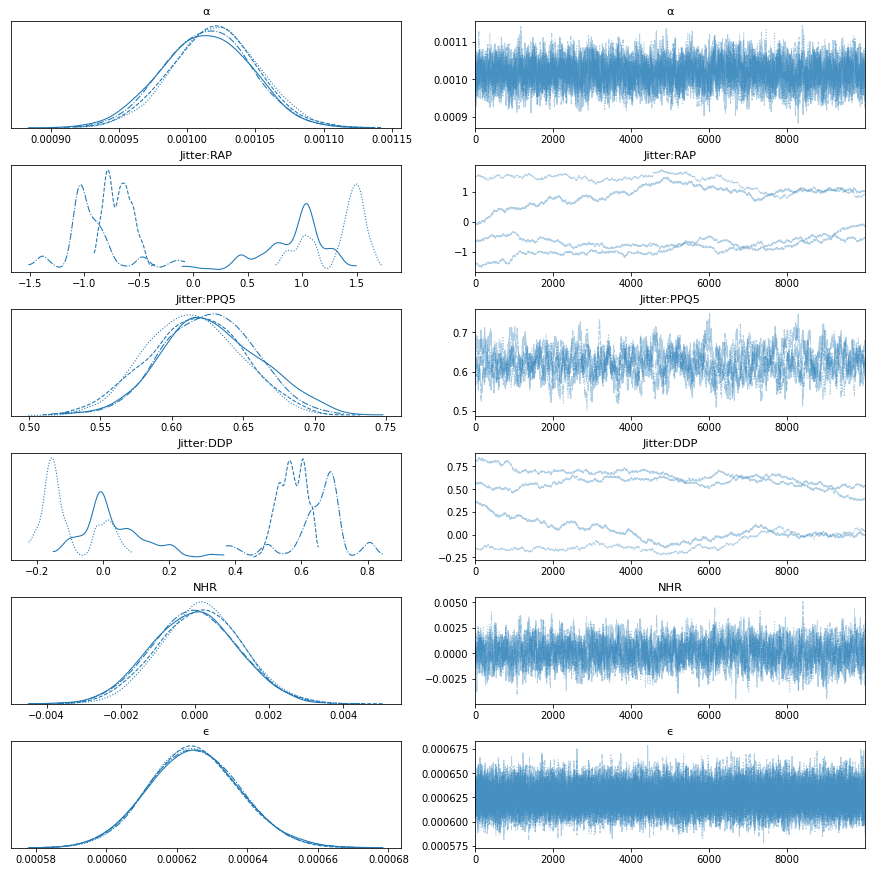

In [55]:
with pm.Model() as model_mlr:

    # Priors
    α = pm.Normal('α', mu=0, sd=1) # Try changing the prior distribution
    
    β_Jitter_RAP = pm.Normal('Jitter:RAP', mu=0, sd=1)
    β_Jitter_PPQ5 = pm.Normal('Jitter:PPQ5', mu=0, sd=1)
    β_Jitter_DDP = pm.Normal('Jitter:DDP', mu=0, sd=1)
    NHR = pm.Normal('NHR', mu=0., sd=1)
   
    ϵ = pm.HalfCauchy('ϵ', 5)
 
    μ = α + X_Jitter_RAP_train_v*β_Jitter_RAP + X_Jitter_PPQ5_train_v*β_Jitter_PPQ5 + X_Jitter_DDP_train_v*β_Jitter_DDP + X_NHR_train_v*NHR
    
    # likelihood

    y_pred = pm.Normal('y_pred', mu=μ, sd=ϵ, observed=yv_train)
    
    step = pm.Slice()

    trace = pm.sample(10000,step, tune=1000)


#     trace = pm.sample(10000, tune=1000)


## Finding the paramters from the  drawn samples

alpha=trace['α'].mean()
beta_Jitter_RAP=trace['Jitter:RAP'].mean()
beta_Jitter_PPQ5=trace['Jitter:PPQ5'].mean()
beta_Jitter_DDP=trace['Jitter:DDP'].mean()
beta_NHR=trace['NHR'].mean()



# Predicted y oytput
y_p = alpha + beta_Jitter_RAP*X_Jitter_RAP_test + beta_Jitter_PPQ5*X_Jitter_PPQ5_test+ beta_Jitter_DDP*X_Jitter_DDP_test+ beta_NHR*X_NHR_test


## Evaluating reults
p= len(X.columns)
print(p)
n= len(X.index)
print(n)

rmse = mean_squared_error(y_test, y_p, squared=False)
print('Root mean square error : ',rmse)
mse = mean_squared_error(y_test, y_p)
print('Mean square error : ',mse)
r2= r2_score(y_test, y_p)
print('R2-score : ',r2)
Adj_r2 = 1-(1-r2)*((n-1)/(n-p-1))
print('Adjusted R2-score : ',Adj_r2)


df_results_r1= df_results_r1.append({'model_name':'MLR-Slice-train/test datastet (general priors','sampling/VI_method':'Slice','RMSE':rmse,'MSE':mse,'R2':r2,
                                  'Adj_R2':Adj_r2,'model_details':model_mlr},ignore_index=True)

az.summary(trace)

pm.traceplot(trace)
pm.summary(trace)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [ϵ, NHR, Jitter:DDP, Jitter:PPQ5, Jitter:RAP, α]


Sampling 4 chains for 1_000 tune and 10_000 draw iterations (4_000 + 40_000 draws total) took 1346 seconds.
There were 4539 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.9066414354408562, but should be close to 0.8. Try to increase the number of tuning steps.
The number of effective samples is smaller than 10% for some parameters.


4
1762
Root mean square error :  0.000702790199406633
Mean square error :  4.939140643820151e-07
R2-score :  0.9635763514498037
Adjusted R2-score :  0.9634934290854321


mean   sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_mean  \
α            0.00 0.00    0.00     0.00       0.00     0.00   2820.00   
Jitter:RAP   0.03 0.94   -1.76     1.79       0.01     0.01  10631.00   
Jitter:PPQ5  0.62 0.04    0.56     0.69       0.00     0.00   6336.00   
Jitter:DDP   0.33 0.31   -0.26     0.93       0.00     0.00  10504.00   
NHR          0.00 0.00   -0.00     0.00       0.00     0.00   9138.00   
ϵ            0.00 0.00    0.00     0.00       0.00     0.00    233.00   

              ess_sd  ess_bulk  ess_tail  r_hat  
α            2730.00   2914.00  15420.00   1.00  
Jitter:RAP   9395.00  10604.00  16043.00   1.00  
Jitter:PPQ5  6331.00   6353.00  12428.00   1.00  
Jitter:DDP  10504.00  10468.00  14842.00   1.00  
NHR          9138.00   9158.00  13192.00   1.00  
ϵ             233.00    220.00    587.00   1.02

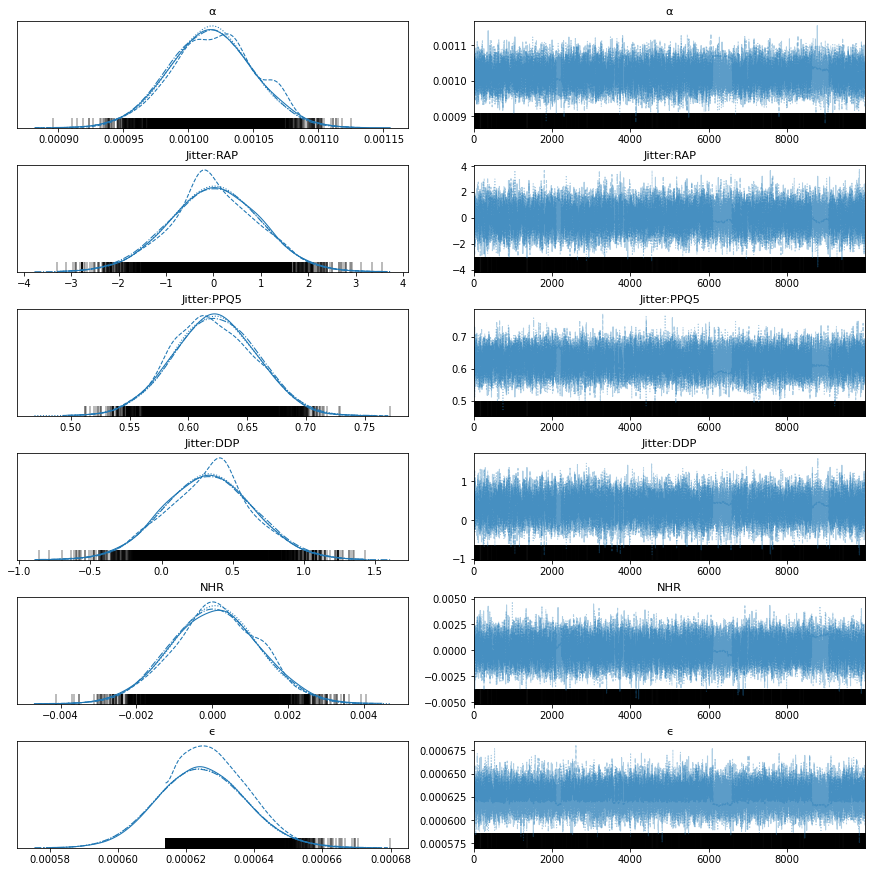

In [56]:
with pm.Model() as model_mlr:

    # Priors
    α = pm.Normal('α', mu=0, sd=1) # Try changing the prior distribution
    
    β_Jitter_RAP = pm.Normal('Jitter:RAP', mu=0, sd=1)
    β_Jitter_PPQ5 = pm.Normal('Jitter:PPQ5', mu=0, sd=1)
    β_Jitter_DDP = pm.Normal('Jitter:DDP', mu=0, sd=1)
    NHR = pm.Normal('NHR', mu=0., sd=1)
   
    ϵ = pm.HalfCauchy('ϵ', 5)
 
    μ = α + X_Jitter_RAP_train_v*β_Jitter_RAP + X_Jitter_PPQ5_train_v*β_Jitter_PPQ5 + X_Jitter_DDP_train_v*β_Jitter_DDP + X_NHR_train_v*NHR
    
    # likelihood

    y_pred = pm.Normal('y_pred', mu=μ, sd=ϵ, observed=yv_train)
    
#     step = pm.Slice()

#     trace = pm.sample(10000,step, tune=1000)


    trace = pm.sample(10000, tune=1000)


## Finding the paramters from the  drawn samples

alpha=trace['α'].mean()
beta_Jitter_RAP=trace['Jitter:RAP'].mean()
beta_Jitter_PPQ5=trace['Jitter:PPQ5'].mean()
beta_Jitter_DDP=trace['Jitter:DDP'].mean()
beta_NHR=trace['NHR'].mean()



# Predicted y oytput
y_p = alpha + beta_Jitter_RAP*X_Jitter_RAP_test + beta_Jitter_PPQ5*X_Jitter_PPQ5_test+ beta_Jitter_DDP*X_Jitter_DDP_test+ beta_NHR*X_NHR_test


## Evaluating reults
p= len(X.columns)
print(p)
n= len(X.index)
print(n)

rmse = mean_squared_error(y_test, y_p, squared=False)
print('Root mean square error : ',rmse)
mse = mean_squared_error(y_test, y_p)
print('Mean square error : ',mse)
r2= r2_score(y_test, y_p)
print('R2-score : ',r2)
Adj_r2 = 1-(1-r2)*((n-1)/(n-p-1))
print('Adjusted R2-score : ',Adj_r2)


df_results_r1= df_results_r1.append({'model_name':'MLR-NUTS-train/test datastet (general priors','sampling/VI_method':'NUTS','RMSE':rmse,'MSE':mse,'R2':r2,
                                  'Adj_R2':Adj_r2,'model_details':model_mlr},ignore_index=True)

az.summary(trace)

pm.traceplot(trace)
pm.summary(trace)

In [57]:
model_mlr

#### We can see that the Adj R2 scores is greater with df scaled dataset

#### 2)	Specific informative prior: based on our dataset on df

In [58]:
X.describe()

Jitter:RAP  Jitter:PPQ5  Jitter:DDP     NHR
count     1762.00      1762.00     1762.00 1762.00
mean         0.00         0.00        0.01    0.03
std          0.00         0.00        0.01    0.04
min          0.00         0.00        0.00    0.00
25%          0.00         0.00        0.00    0.01
50%          0.00         0.00        0.01    0.02
75%          0.00         0.00        0.01    0.03
max          0.04         0.05        0.13    0.73

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Slice: [ϵ]
>Slice: [NHR]
>Slice: [Jitter:DDP]
>Slice: [Jitter:PPQ5]
>Slice: [Jitter:RAP]
>Slice: [α]


Sampling 4 chains for 1_000 tune and 10_000 draw iterations (4_000 + 40_000 draws total) took 67 seconds.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.


4
1762
Root mean square error :  0.0007026968850800398
Mean square error :  4.937829123011906e-07
R2-score :  0.9635860232482866
Adjusted R2-score :  0.9635031229028075


mean   sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_mean  \
α            0.00 0.00    0.00     0.00       0.00     0.00    284.00   
Jitter:RAP   0.49 2.63   -3.75     6.00       1.29     0.99      4.00   
Jitter:PPQ5  0.62 0.04    0.56     0.69       0.00     0.00    298.00   
Jitter:DDP   0.18 0.88   -1.68     1.59       0.43     0.33      4.00   
NHR          0.00 0.00   -0.00     0.00       0.00     0.00    141.00   
ϵ            0.00 0.00    0.00     0.00       0.00     0.00  39913.00   

              ess_sd  ess_bulk  ess_tail  r_hat  
α             283.00    285.00   2256.00   1.03  
Jitter:RAP      4.00      4.00     11.00   4.24  
Jitter:PPQ5   298.00    299.00    674.00   1.03  
Jitter:DDP      4.00      4.00     11.00   4.23  
NHR           141.00    142.00   1655.00   1.04  
ϵ           39749.00  39954.00  30020.00   1.00

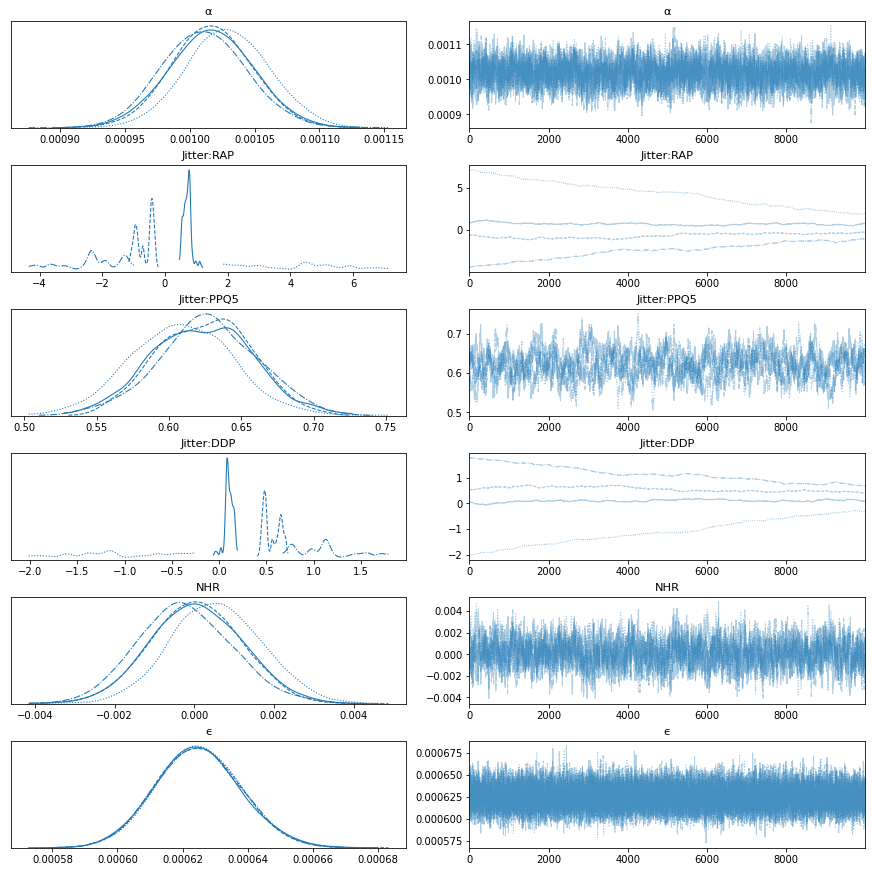

In [59]:

with pm.Model() as model_mlr:

   # Prirors
    α = pm.Normal('α', mu=2, sd=2) # Try changing the prior distribution

    β_Jitter_RAP = pm.Normal('Jitter:RAP', mu=0, sd=0.5)
    β_Jitter_PPQ5 = pm.Normal('Jitter:PPQ5', mu=0, sd=0.5)
    β_Jitter_DDP = pm.Normal('Jitter:DDP', mu=0, sd=0.5)
    NHR = pm.Normal('NHR', mu=0, sd=1)
    

   
    ϵ = pm.HalfCauchy('ϵ', 5)
 
    μ = α + X_Jitter_RAP_train_v*β_Jitter_RAP + X_Jitter_PPQ5_train_v*β_Jitter_PPQ5 + X_Jitter_DDP_train_v*β_Jitter_DDP + X_NHR_train_v*NHR
    
    # likelihood

    y_pred = pm.Normal('y_pred', mu=μ, sd=ϵ, observed=yv_train)
    
    step = pm.Slice()

    trace = pm.sample(10000,step, tune=1000)
    



## Finding the paramters from the  drawn samples

alpha=trace['α'].mean()
beta_Jitter_RAP=trace['Jitter:RAP'].mean()
beta_Jitter_PPQ5=trace['Jitter:PPQ5'].mean()
beta_Jitter_DDP=trace['Jitter:DDP'].mean()
beta_NHR=trace['NHR'].mean()



# Predicted y oytput
y_p = alpha + beta_Jitter_RAP*X_Jitter_RAP_test + beta_Jitter_PPQ5*X_Jitter_PPQ5_test+ beta_Jitter_DDP*X_Jitter_DDP_test+ beta_NHR*X_NHR_test


## Evaluating reults
p= len(X.columns)
print(p)
n= len(X.index)
print(n)

rmse = mean_squared_error(y_test, y_p, squared=False)
print('Root mean square error : ',rmse)
mse = mean_squared_error(y_test, y_p)
print('Mean square error : ',mse)
r2= r2_score(y_test, y_p)
print('R2-score : ',r2)
Adj_r2 = 1-(1-r2)*((n-1)/(n-p-1))
print('Adjusted R2-score : ',Adj_r2)


df_results_r1= df_results_r1.append({'model_name':'MLR-Slice-train/test datastet (specific priors','sampling/VI_method':'Slice','RMSE':rmse,'MSE':mse,'R2':r2,
                                  'Adj_R2':Adj_r2,'model_details':model_mlr},ignore_index=True)

az.summary(trace)

pm.traceplot(trace)
pm.summary(trace)

In [60]:
df_results_r1

model_name sampling/VI_method  RMSE  \
0             Linear Regression-tain/test dataste                 NA  0.00   
1             Linear Regression-tain/test dataste                 NA  0.12   
2   MLR-Slice-train/test datastet (general priors              Slice  0.13   
3   MLR-Slice-train/test datastet (general priors              Slice  0.00   
4    MLR-NUTS-train/test datastet (general priors               NUTS  0.00   
5  MLR-Slice-train/test datastet (specific priors              Slice  0.00   

   MSE   R2  Adj_R2                                 model_details  
0 0.00 0.96    0.96                            LinearRegression()  
1 0.02 0.96    0.96                            LinearRegression()  
2 0.02 0.96    0.96  <pymc3.model.Model object at 0x7f3d3357dd90>  
3 0.00 0.96    0.96  <pymc3.model.Model object at 0x7f3d28979710>  
4 0.00 0.96    0.96  <pymc3.model.Model object at 0x7f3d3c78b250>  
5 0.00 0.96    0.96  <pymc3.model.Model object at 0x7f3d29598810>

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Slice: [ϵ]
>Slice: [NHR]
>Slice: [Jitter:DDP]
>Slice: [Jitter:PPQ5]
>Slice: [Jitter:RAP]
>Slice: [α]


Sampling 4 chains for 1_000 tune and 10_000 draw iterations (4_000 + 40_000 draws total) took 60 seconds.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.


4
1762
Root mean square error :  0.0007041605816273776
Mean square error :  4.958421247178066e-07
R2-score :  0.963434166812599
Adjusted R2-score :  0.9633509207495656


mean   sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_mean  \
α            0.00 0.00    0.00     0.00       0.00     0.00   2079.00   
Jitter:RAP   0.58 0.27    0.14     1.04       0.12     0.09      5.00   
Jitter:PPQ5  0.61 0.03    0.55     0.68       0.00     0.00    427.00   
Jitter:DDP   0.15 0.09    0.00     0.29       0.04     0.03      5.00   
NHR          0.00 0.00    0.00     0.00       0.00     0.00   2232.00   
ϵ            0.00 0.00    0.00     0.00       0.00     0.00  40139.00   

              ess_sd  ess_bulk  ess_tail  r_hat  
α            2078.00   2081.00   6145.00   1.00  
Jitter:RAP      5.00      6.00     17.00   1.90  
Jitter:PPQ5   427.00    427.00    916.00   1.00  
Jitter:DDP      5.00      6.00     15.00   1.90  
NHR          2206.00   2519.00   3612.00   1.00  
ϵ           40109.00  40172.00  29817.00   1.00

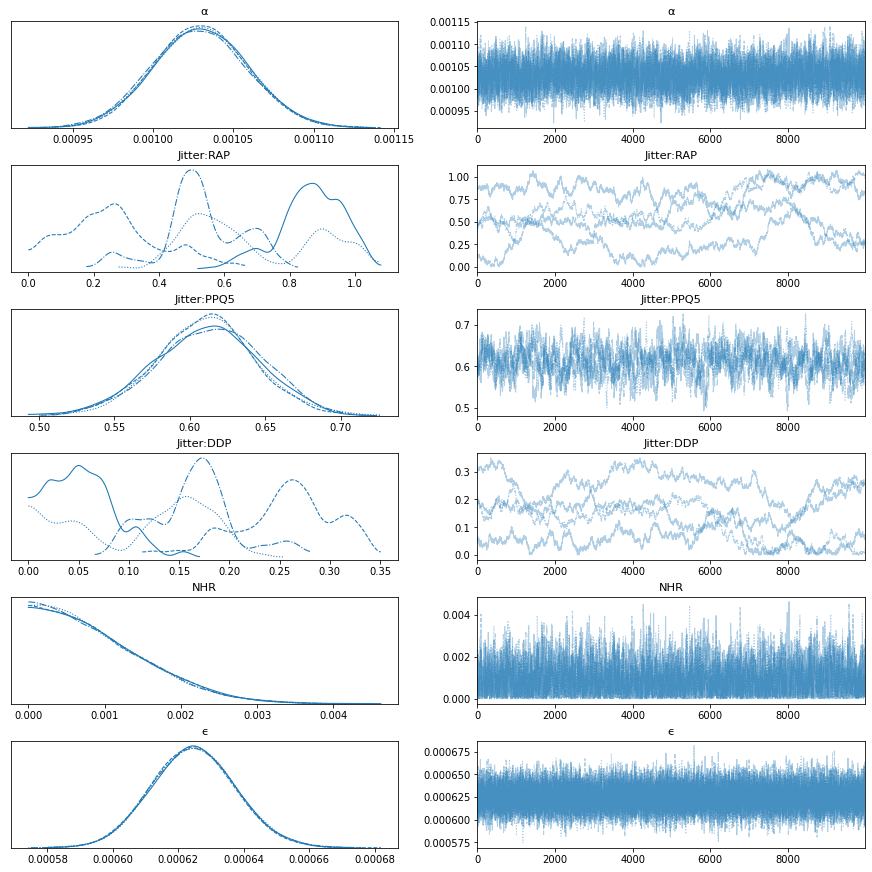

In [61]:

with pm.Model() as model_mlr: ### using NUTS

   # Prirors

    α = pm.Normal('α', mu=2, sd=2) # Try changing the prior distribution

    β_Jitter_RAP = pm.HalfNormal('Jitter:RAP', sd=0.5)
    β_Jitter_PPQ5 = pm.HalfNormal('Jitter:PPQ5',  sd=0.5)
    β_Jitter_DDP = pm.HalfNormal('Jitter:DDP', sd=0.5)
    NHR = pm.HalfNormal('NHR',  sd=1)
    
   
    ϵ = pm.HalfCauchy('ϵ', 5)
 
    μ = α + X_Jitter_RAP_train_v*β_Jitter_RAP + X_Jitter_PPQ5_train_v*β_Jitter_PPQ5 + X_Jitter_DDP_train_v*β_Jitter_DDP + X_NHR_train_v*NHR
    
    # likelihood

    y_pred = pm.Normal('y_pred', mu=μ, sd=ϵ, observed=yv_train)
    
    step = pm.Slice()

    trace = pm.sample(10000,step, tune=1000)
    
    

#     trace = pm.sample(10000, tune=1000)


## Finding the paramters from the  drawn samples

alpha=trace['α'].mean()
beta_Jitter_RAP=trace['Jitter:RAP'].mean()
beta_Jitter_PPQ5=trace['Jitter:PPQ5'].mean()
beta_Jitter_DDP=trace['Jitter:DDP'].mean()
beta_NHR=trace['NHR'].mean()



# Predicted y oytput
y_p = alpha + beta_Jitter_RAP*X_Jitter_RAP_test + beta_Jitter_PPQ5*X_Jitter_PPQ5_test+ beta_Jitter_DDP*X_Jitter_DDP_test+ beta_NHR*X_NHR_test


## Evaluating reults
p= len(X.columns)
print(p)
n= len(X.index)
print(n)

rmse = mean_squared_error(y_test, y_p, squared=False)
print('Root mean square error : ',rmse)
mse = mean_squared_error(y_test, y_p)
print('Mean square error : ',mse)
r2= r2_score(y_test, y_p)
print('R2-score : ',r2)
Adj_r2 = 1-(1-r2)*((n-1)/(n-p-1))
print('Adjusted R2-score : ',Adj_r2)


df_results_r1= df_results_r1.append({'model_name':'MLR-NUTS-train/test datastet (specific priors','sampling/VI_method':'NUTS','RMSE':rmse,'MSE':mse,'R2':r2,
                                  'Adj_R2':Adj_r2,'model_details':model_mlr},ignore_index=True)

az.summary(trace)

pm.traceplot(trace)
pm.summary(trace)


## MLR-Robuston train-test dataset df

#### 1)	Generic weakly informative prior: normal(0, 1)

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Slice: [ν_]
>Slice: [ϵ]
>Slice: [NHR]
>Slice: [Jitter:DDP]
>Slice: [Jitter:PPQ5]
>Slice: [Jitter:RAP]
>Slice: [α]


Sampling 4 chains for 1_000 tune and 10_000 draw iterations (4_000 + 40_000 draws total) took 81 seconds.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.


4
1762
Root mean square error :  0.0006557725726336296
Mean square error :  4.30037667018529e-07
R2-score :  0.968286910666479
Adjusted R2-score :  0.9682147123982182


mean   sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_mean  \
α            0.00 0.00    0.00     0.00       0.00     0.00    798.00   
Jitter:RAP  -0.33 0.61   -1.31     0.66       0.29     0.22      4.00   
Jitter:PPQ5  0.79 0.04    0.71     0.86       0.00     0.00    343.00   
Jitter:DDP   0.40 0.20    0.08     0.73       0.10     0.07      4.00   
NHR          0.01 0.00    0.01     0.02       0.00     0.00   3223.00   
ϵ            0.00 0.00    0.00     0.00       0.00     0.00   9882.00   
ν_           1.53 0.22    1.12     1.95       0.00     0.00  10009.00   
ν            2.53 0.22    2.12     2.95       0.00     0.00  10009.00   

              ess_sd  ess_bulk  ess_tail  r_hat  
α             798.00    799.00   2785.00   1.00  
Jitter:RAP      4.00      5.00     22.00   2.79  
Jitter:PPQ5   343.00    343.00    705.00   1.01  
Jitter:DDP      4.00      5.00     20.00   2.80  
NHR          3209.00   3221.00   6974.00   1.00  
ϵ            9882.00   9833.00  19917.00   1.00  
ν_          10009.00   9912.00  18394.00   1.00  
ν           10009.00   9912.00  18394.00   1.00

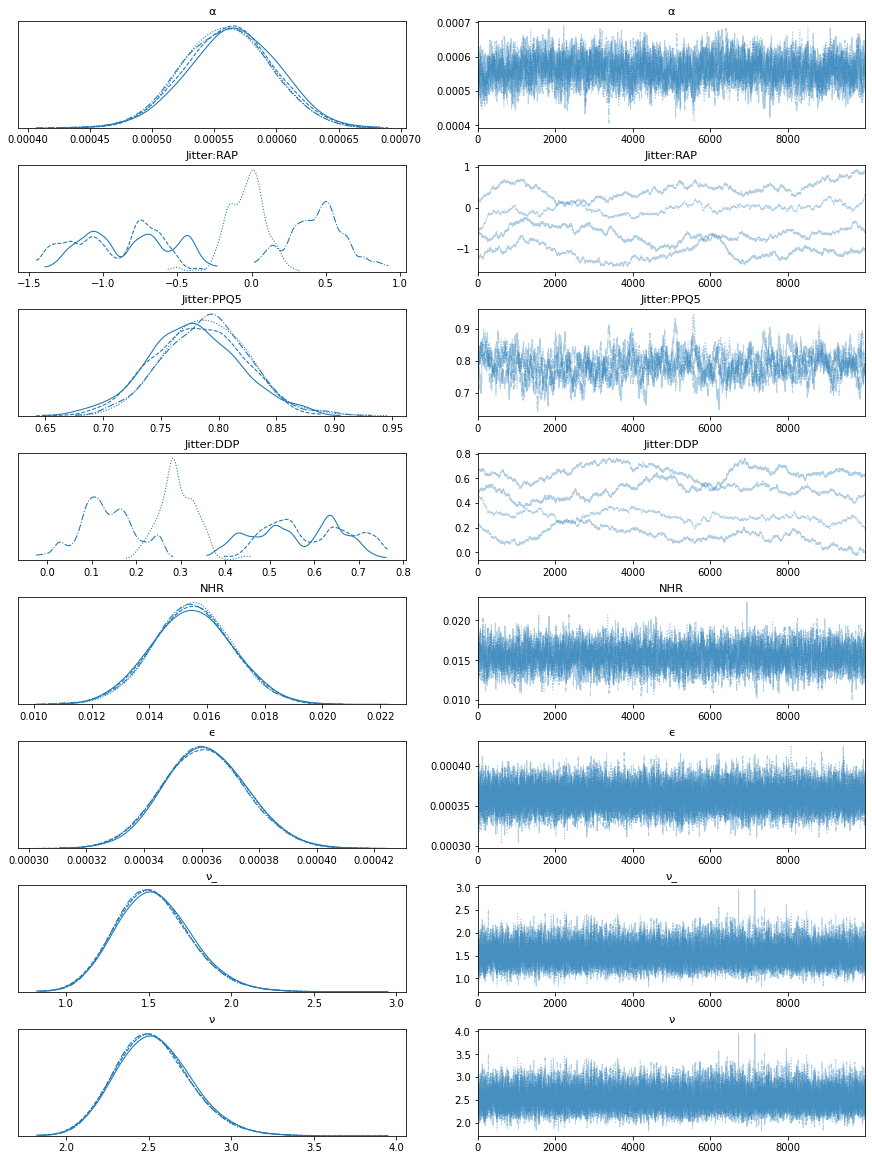

In [62]:
with pm.Model() as model_mlr:

    # Priors
    
    α = pm.Normal('α', mu=y.mean(), sd=1)
    
    β_Jitter_RAP = pm.Normal('Jitter:RAP', mu=0, sd=1)
    β_Jitter_PPQ5 = pm.Normal('Jitter:PPQ5', mu=0, sd=1)
    β_Jitter_DDP = pm.Normal('Jitter:DDP', mu=0, sd=1)
    NHR = pm.Normal('NHR', mu=0., sd=1)
    
    μ = α + X_Jitter_RAP_train_v*β_Jitter_RAP + X_Jitter_PPQ5_train_v*β_Jitter_PPQ5 + X_Jitter_DDP_train_v*β_Jitter_DDP + X_NHR_train_v*NHR
   
    ϵ = pm.HalfNormal('ϵ', 5)
    ν_ = pm.Exponential('ν_', 1/29)
    ν = pm.Deterministic('ν', ν_ + 1) # shifting the exponential to avoid values close to 0
    
    # likelihood

    y_pred = pm.StudentT('y_pred', mu=μ, sd=ϵ, nu=ν, observed=yv_train)
    
    step = pm.Slice()

    trace = pm.sample(10000,step, tune=1000)

    # trace = pm.sample(10000, tune=1000)

## Finding the paramters from the  drawn samples

alpha=trace['α'].mean()
beta_Jitter_RAP=trace['Jitter:RAP'].mean()
beta_Jitter_PPQ5=trace['Jitter:PPQ5'].mean()
beta_Jitter_DDP=trace['Jitter:DDP'].mean()
beta_NHR=trace['NHR'].mean()

# Predicted y oytput
y_p = alpha + beta_Jitter_RAP*X_Jitter_RAP_test + beta_Jitter_PPQ5*X_Jitter_PPQ5_test+ beta_Jitter_DDP*X_Jitter_DDP_test+ beta_NHR*X_NHR_test


## Evaluating reults
p= len(X.columns)
print(p)
n= len(X.index)
print(n)

rmse = mean_squared_error(y_test, y_p, squared=False)
print('Root mean square error : ',rmse)
mse = mean_squared_error(y_test, y_p)
print('Mean square error : ',mse)
r2= r2_score(y_test, y_p)
print('R2-score : ',r2)
Adj_r2 = 1-(1-r2)*((n-1)/(n-p-1))
print('Adjusted R2-score : ',Adj_r2)


df_results_r1= df_results_r1.append({'model_name':'MLR-Robust-Slice-train/test datastet (general priors',
                                     'sampling/VI_method':'Slice','RMSE':rmse,'MSE':mse,'R2':r2,
                                  'Adj_R2':Adj_r2,'model_details':model_mlr},ignore_index=True)

az.summary(trace)

pm.traceplot(trace)
pm.summary(trace)

In [63]:
model_mlr

#### 2)	Specific informative prior: based on our dataset

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [ν_, ϵ, NHR, Jitter:DDP, Jitter:PPQ5, Jitter:RAP, α]


Sampling 4 chains for 1_000 tune and 10_000 draw iterations (4_000 + 40_000 draws total) took 180 seconds.
There were 2582 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.5771860673438513, but should be close to 0.8. Try to increase the number of tuning steps.
There were 1855 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.6715654907256293, but should be close to 0.8. Try to increase the number of tuning steps.
There were 3123 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.4872385607073947, but should be close to 0.8. Try to increase the number of tuning steps.
There were 2498 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.6189026177652212, but should be

4
1762
Root mean square error :  0.0006550471634457843
Mean square error :  4.2908678633836804e-07
R2-score :  0.9683570332772832
Adjusted R2-score :  0.9682849946507089


mean   sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_mean  ess_sd  \
α            0.00 0.00    0.00     0.00       0.00     0.00     23.00   23.00   
Jitter:RAP   0.19 0.14    0.00     0.52       0.06     0.05      6.00    5.00   
Jitter:PPQ5  0.78 0.04    0.71     0.84       0.01     0.01     16.00   16.00   
Jitter:DDP   0.22 0.05    0.09     0.29       0.02     0.02      6.00    6.00   
NHR          0.01 0.00    0.01     0.02       0.00     0.00     68.00   65.00   
ϵ            0.00 0.00    0.00     0.00       0.00     0.00     26.00   26.00   
ν_           1.55 0.20    1.19     1.96       0.02     0.02     85.00   85.00   
ν            2.55 0.20    2.19     2.96       0.02     0.02     85.00   85.00   

             ess_bulk  ess_tail  r_hat  
α               24.00    441.00   1.11  
Jitter:RAP       8.00     12.00   1.42  
Jitter:PPQ5     18.00    374.00   1.15  
Jitter:DDP       8.00     12.00   1.41  
NHR             63.00    405.00   1.04  
ϵ               27.00    134.00   1.10  
ν_              83.00    637.00   1.06  
ν               83.00    637.00   1.06

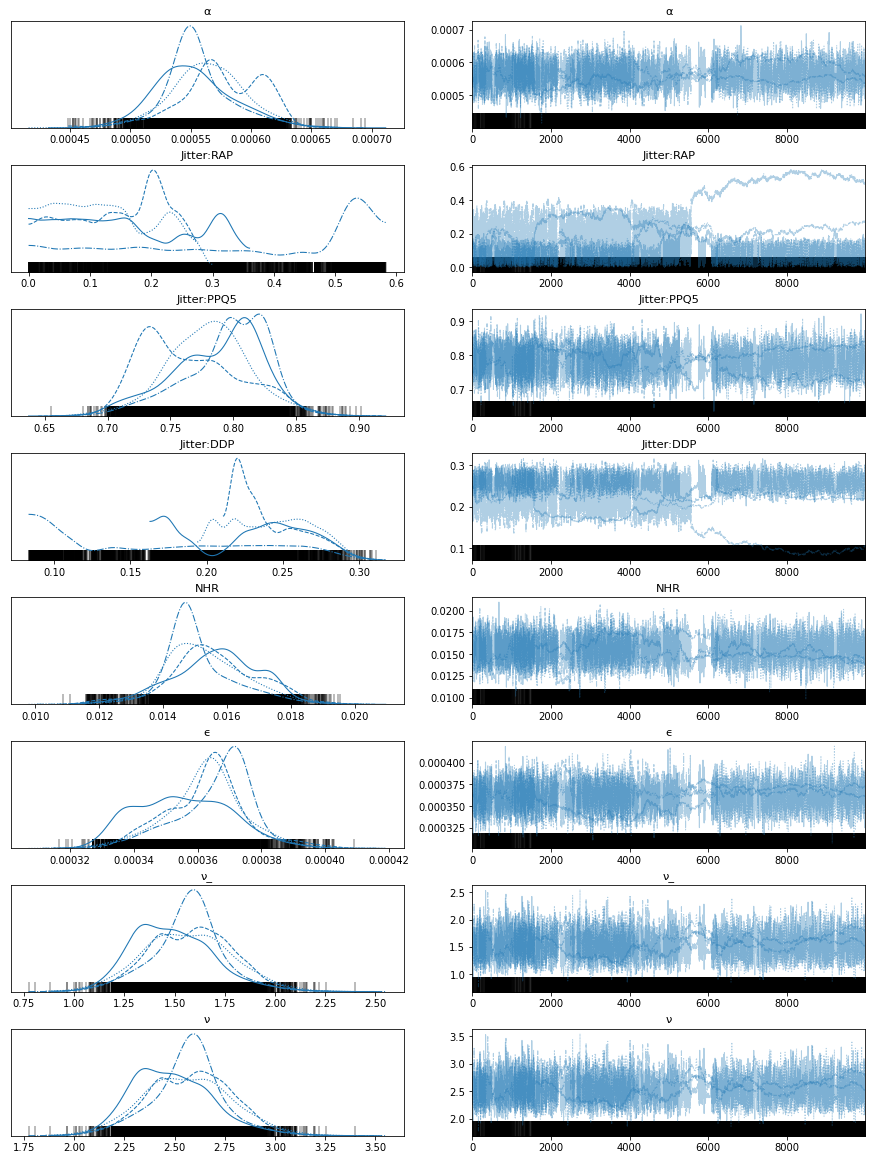

In [64]:
with pm.Model() as model_mlr:   # with NUTs
    

   # Prirors

        
    # Prirors

    α = pm.Normal('α', mu=2, sd=2) # Try changing the prior distribution

    β_Jitter_RAP = pm.HalfNormal('Jitter:RAP', sd=0.5)
    β_Jitter_PPQ5 = pm.HalfNormal('Jitter:PPQ5',  sd=0.5)
    β_Jitter_DDP = pm.HalfNormal('Jitter:DDP', sd=0.5)
    NHR = pm.HalfNormal('NHR',  sd=1)
    

   
    μ = α + X_Jitter_RAP_train_v*β_Jitter_RAP + X_Jitter_PPQ5_train_v*β_Jitter_PPQ5 + X_Jitter_DDP_train_v*β_Jitter_DDP + X_NHR_train_v*NHR
   
    ϵ = pm.HalfNormal('ϵ', 5)
    ν_ = pm.Exponential('ν_', 1/29)
    ν = pm.Deterministic('ν', ν_ + 1) # shifting the exponential to avoid values close to 0
    
    # likelihood

    y_pred = pm.StudentT('y_pred', mu=μ, sd=ϵ, nu=ν, observed=yv_train)

    trace = pm.sample(10000, tune=1000)
    


## Finding the paramters from the  drawn samples

alpha=trace['α'].mean()
beta_Jitter_RAP=trace['Jitter:RAP'].mean()
beta_Jitter_PPQ5=trace['Jitter:PPQ5'].mean()
beta_Jitter_DDP=trace['Jitter:DDP'].mean()
beta_NHR=trace['NHR'].mean()



# Predicted y oytput
y_p = alpha + beta_Jitter_RAP*X_Jitter_RAP_test + beta_Jitter_PPQ5*X_Jitter_PPQ5_test+ beta_Jitter_DDP*X_Jitter_DDP_test+ beta_NHR*X_NHR_test


## Evaluating reults
p= len(X.columns)
print(p)
n= len(X.index)
print(n)

rmse = mean_squared_error(y_test, y_p, squared=False)
print('Root mean square error : ',rmse)
mse = mean_squared_error(y_test, y_p)
print('Mean square error : ',mse)
r2= r2_score(y_test, y_p)
print('R2-score : ',r2)
Adj_r2 = 1-(1-r2)*((n-1)/(n-p-1))
print('Adjusted R2-score : ',Adj_r2)


df_results_r1= df_results_r1.append({'model_name':'MLR-Robust-Slice-train/test datastet (specific priors',
                                     'sampling/VI_method':'Slice','RMSE':rmse,'MSE':mse,'R2':r2,
                                  'Adj_R2':Adj_r2,'model_details':model_mlr},ignore_index=True)

az.summary(trace)

pm.traceplot(trace)
pm.summary(trace)

In [65]:
model_mlr

In [66]:
df_results_r1

model_name sampling/VI_method  RMSE  \
0                Linear Regression-tain/test dataste                 NA  0.00   
1                Linear Regression-tain/test dataste                 NA  0.12   
2      MLR-Slice-train/test datastet (general priors              Slice  0.13   
3      MLR-Slice-train/test datastet (general priors              Slice  0.00   
4       MLR-NUTS-train/test datastet (general priors               NUTS  0.00   
5     MLR-Slice-train/test datastet (specific priors              Slice  0.00   
6      MLR-NUTS-train/test datastet (specific priors               NUTS  0.00   
7  MLR-Robust-Slice-train/test datastet (general ...              Slice  0.00   
8  MLR-Robust-Slice-train/test datastet (specific...              Slice  0.00   

   MSE   R2  Adj_R2                                 model_details  
0 0.00 0.96    0.96                            LinearRegression()  
1 0.02 0.96    0.96                            LinearRegression()  
2 0.02 0.96    0.96  <pymc3.model.Model object at 0x7f3d3357dd90>  
3 0.00 0.96    0.96  <pymc3.model.Model object at 0x7f3d28979710>  
4 0.00 0.96    0.96  <pymc3.model.Model object at 0x7f3d3c78b250>  
5 0.00 0.96    0.96  <pymc3.model.Model object at 0x7f3d29598810>  
6 0.00 0.96    0.96  <pymc3.model.Model object at 0x7f3d214b9450>  
7 0.00 0.97    0.97  <pymc3.model.Model object at 0x7f3d3c484e10>  
8 0.00 0.97    0.97  <pymc3.model.Model object at 0x7f3d1e7d2810>

In [67]:
df_results_r1.sort_values('Adj_R2',ascending=False)

model_name sampling/VI_method  RMSE  \
8  MLR-Robust-Slice-train/test datastet (specific...              Slice  0.00   
7  MLR-Robust-Slice-train/test datastet (general ...              Slice  0.00   
3      MLR-Slice-train/test datastet (general priors              Slice  0.00   
0                Linear Regression-tain/test dataste                 NA  0.00   
1                Linear Regression-tain/test dataste                 NA  0.12   
5     MLR-Slice-train/test datastet (specific priors              Slice  0.00   
4       MLR-NUTS-train/test datastet (general priors               NUTS  0.00   
2      MLR-Slice-train/test datastet (general priors              Slice  0.13   
6      MLR-NUTS-train/test datastet (specific priors               NUTS  0.00   

   MSE   R2  Adj_R2                                 model_details  
8 0.00 0.97    0.97  <pymc3.model.Model object at 0x7f3d1e7d2810>  
7 0.00 0.97    0.97  <pymc3.model.Model object at 0x7f3d3c484e10>  
3 0.00 0.96    0.96  <pymc3.model.Model object at 0x7f3d28979710>  
0 0.00 0.96    0.96                            LinearRegression()  
1 0.02 0.96    0.96                            LinearRegression()  
5 0.00 0.96    0.96  <pymc3.model.Model object at 0x7f3d29598810>  
4 0.00 0.96    0.96  <pymc3.model.Model object at 0x7f3d3c78b250>  
2 0.02 0.96    0.96  <pymc3.model.Model object at 0x7f3d3357dd90>  
6 0.00 0.96    0.96  <pymc3.model.Model object at 0x7f3d214b9450>

### Chosing the best model hence from above results best results are given by specifit prirors with  MLR on scaled train/test datset we will use this model and prior for our further analysis

## Making a MCMC function for our best models

In [68]:
def model_mcmc(sampling):
    
    with pm.Model() as model_mlr:
    
    
    # Priors
        α = pm.Normal('α', mu=0, sd=1) # Try changing the prior distribution
        
        β_Jitter_RAP = pm.Normal('Jitter:RAP', mu=0, sd=1)
        β_Jitter_PPQ5 = pm.Normal('Jitter:PPQ5', mu=0, sd=1)
        β_Jitter_DDP = pm.Normal('Jitter:DDP', mu=0, sd=1)
        NHR = pm.Normal('NHR', mu=0., sd=1)
    
        ϵ = pm.HalfCauchy('ϵ', 5)
    
        μ = α + Xs_Jitter_RAP_train_v*β_Jitter_RAP + Xs_Jitter_PPQ5_train_v*β_Jitter_PPQ5 + Xs_Jitter_DDP_train_v*β_Jitter_DDP + Xs_NHR_train_v*NHR
        
        # likelihood

        y_pred = pm.Normal('y_pred', mu=μ, sd=ϵ, observed=ysv_train)
        
        if sampling == 'HMC':
            step = pm.HamiltonianMC()
            
        elif sampling == 'metropolis':
            step = pm.Metropolis()
            
        elif sampling == 'slice':
            step = pm.Slice()
            
        elif sampling == 'NUTS':
            step = pm.NUTS()
        
        # step = pm.Slice()

        trace = pm.sample(10000,step, tune=1000)


    #     trace = pm.sample(10000, tune=1000)


    ## Finding the paramters from the  drawn samples

    alpha=trace['α'].mean()
    beta_Jitter_RAP=trace['Jitter:RAP'].mean()
    beta_Jitter_PPQ5=trace['Jitter:PPQ5'].mean()
    beta_Jitter_DDP=trace['Jitter:DDP'].mean()
    beta_NHR=trace['NHR'].mean()



    # Predicted y oytput
    y_p = alpha + beta_Jitter_RAP*Xs_Jitter_RAP_test + beta_Jitter_PPQ5*Xs_Jitter_PPQ5_test+ beta_Jitter_DDP*Xs_Jitter_DDP_test+ beta_NHR*Xs_NHR_test


    ## Evaluating reults
    p= len(X.columns)
    print(p)
    n= len(X.index)
    print(n)

    rmse = mean_squared_error(ys_test, y_p, squared=False)
    print('Root mean square error : ',rmse)
    mse = mean_squared_error(ys_test, y_p)
    print('Mean square error : ',mse)
    r2= r2_score(ys_test, y_p)
    print('R2-score : ',r2)
    Adj_r2 = 1-(1-r2)*((n-1)/(n-p-1))
    print('Adjusted R2-score : ',Adj_r2)

    global df_results_r1


    df_results_r1= df_results_r1.append({'model_name':str(sampling)+' MLR-Robust-Nuts-train/test datastet (G)',
                                        'sampling/VI_method':sampling,'RMSE':rmse,'MSE':mse,'R2':r2,
                                    'Adj_R2':Adj_r2,'model_details':model_mlr},ignore_index=True)

    az.summary(trace)

    pm.traceplot(trace)
    print(pm.summary(trace))
    return(model_mlr)



## Making a function for Variational Inference

In [69]:
def model_vi(vi_method):
    
    vi=vi_method

    with pm.Model() as model_mlr:
        
    
        
    # Priors
        α = pm.Normal('α', mu=0, sd=1) # Try changing the prior distribution
        
        β_Jitter_RAP = pm.Normal('Jitter:RAP', mu=0, sd=1)
        β_Jitter_PPQ5 = pm.Normal('Jitter:PPQ5', mu=0, sd=1)
        β_Jitter_DDP = pm.Normal('Jitter:DDP', mu=0, sd=1)
        NHR = pm.Normal('NHR', mu=0., sd=1)
    
        ϵ = pm.HalfCauchy('ϵ', 5)
    
        μ = α + Xs_Jitter_RAP_train_v*β_Jitter_RAP + Xs_Jitter_PPQ5_train_v*β_Jitter_PPQ5 + Xs_Jitter_DDP_train_v*β_Jitter_DDP + Xs_NHR_train_v*NHR
        
        # likelihood

        y_pred = pm.Normal('y_pred', mu=μ, sd=ϵ, observed=ysv_train)
        
        # step = pm.Metropolis()
        # trace = pm.sample(2000,step, tune=1000)
     


    ## Finding the paramters from the  drawn samples
    
    
    print('for VI')
    with model_mlr:
        mean_field = pm.fit(method=vi_method) # VI
        

    trace=mean_field.sample(10000)    



    alpha=trace['α'].mean()
    beta_Jitter_RAP=trace['Jitter:RAP'].mean()
    beta_Jitter_PPQ5=trace['Jitter:PPQ5'].mean()
    beta_Jitter_DDP=trace['Jitter:DDP'].mean()
    beta_NHR=trace['NHR'].mean()


    # Predicted y oytput
    y_p = alpha + beta_Jitter_RAP*Xs_Jitter_RAP_test + beta_Jitter_PPQ5*Xs_Jitter_PPQ5_test+ beta_Jitter_DDP*Xs_Jitter_DDP_test+ beta_NHR*Xs_NHR_test


    ## Evaluating reults
    p= len(X.columns)
    print(p)
    n= len(X.index)
    print(n)

    rmse = mean_squared_error(ys_test, y_p, squared=False)
    print('Root mean square error : ',rmse)
    mse = mean_squared_error(ys_test, y_p)
    print('Mean square error : ',mse)
    r2= r2_score(ys_test, y_p)
    print('R2-score : ',r2)
    Adj_r2 = 1-(1-r2)*((n-1)/(n-p-1))
    print('Adjusted R2-score : ',Adj_r2)

    global df_results_r1


    df_results_r1= df_results_r1.append({'model_name':str(vi_method)+' MLR-Robust-Nuts-train/test datastet (G)',
                                        'sampling/VI_method':vi_method,'RMSE':rmse,'MSE':mse,'R2':r2,
                                    'Adj_R2':Adj_r2,'model_details':model_mlr},ignore_index=True)

    az.summary(trace)

    pm.traceplot(trace)
    pm.summary(trace)
    return(model_mlr)

In [70]:
df_results_r1

model_name sampling/VI_method  RMSE  \
0                Linear Regression-tain/test dataste                 NA  0.00   
1                Linear Regression-tain/test dataste                 NA  0.12   
2      MLR-Slice-train/test datastet (general priors              Slice  0.13   
3      MLR-Slice-train/test datastet (general priors              Slice  0.00   
4       MLR-NUTS-train/test datastet (general priors               NUTS  0.00   
5     MLR-Slice-train/test datastet (specific priors              Slice  0.00   
6      MLR-NUTS-train/test datastet (specific priors               NUTS  0.00   
7  MLR-Robust-Slice-train/test datastet (general ...              Slice  0.00   
8  MLR-Robust-Slice-train/test datastet (specific...              Slice  0.00   

   MSE   R2  Adj_R2                                 model_details  
0 0.00 0.96    0.96                            LinearRegression()  
1 0.02 0.96    0.96                            LinearRegression()  
2 0.02 0.96    0.96  <pymc3.model.Model object at 0x7f3d3357dd90>  
3 0.00 0.96    0.96  <pymc3.model.Model object at 0x7f3d28979710>  
4 0.00 0.96    0.96  <pymc3.model.Model object at 0x7f3d3c78b250>  
5 0.00 0.96    0.96  <pymc3.model.Model object at 0x7f3d29598810>  
6 0.00 0.96    0.96  <pymc3.model.Model object at 0x7f3d214b9450>  
7 0.00 0.97    0.97  <pymc3.model.Model object at 0x7f3d3c484e10>  
8 0.00 0.97    0.97  <pymc3.model.Model object at 0x7f3d1e7d2810>

# MCMC differnet Sampling Methods

## 1 NUTS

Multiprocess sampling (4 chains in 4 jobs)
NUTS: [ϵ, NHR, Jitter:DDP, Jitter:PPQ5, Jitter:RAP, α]


Sampling 4 chains for 1_000 tune and 10_000 draw iterations (4_000 + 40_000 draws total) took 1328 seconds.
There were 65 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.8801857169599286, but should be close to 0.8. Try to increase the number of tuning steps.


4
1762
Root mean square error :  0.1249741194080446
Mean square error :  0.015618530521816193
R2-score :  0.9635729355110015
Adjusted R2-score :  0.963490005369877
             mean   sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_mean  \
α           -0.00 0.00   -0.01     0.00       0.00     0.00  31540.00   
Jitter:RAP   0.22 0.69   -1.04     1.57       0.01     0.00  17480.00   
Jitter:PPQ5  0.41 0.02    0.37     0.46       0.00     0.00  30345.00   
Jitter:DDP   0.35 0.69   -0.96     1.65       0.01     0.00  17486.00   
NHR          0.00 0.01   -0.02     0.02       0.00     0.00  28050.00   
ϵ            0.11 0.00    0.11     0.12       0.00     0.00  28525.00   

              ess_sd  ess_bulk  ess_tail  r_hat  
α           27859.00  31535.00  26464.00   1.00  
Jitter:RAP  17480.00  17484.00  21726.00   1.00  
Jitter:PPQ5 30345.00  30336.00  26741.00   1.00  
Jitter:DDP  17486.00  17492.00  21615.00   1.00  
NHR         19716.00  28093.00  26957.00   1.00  
ϵ           28525.00  28

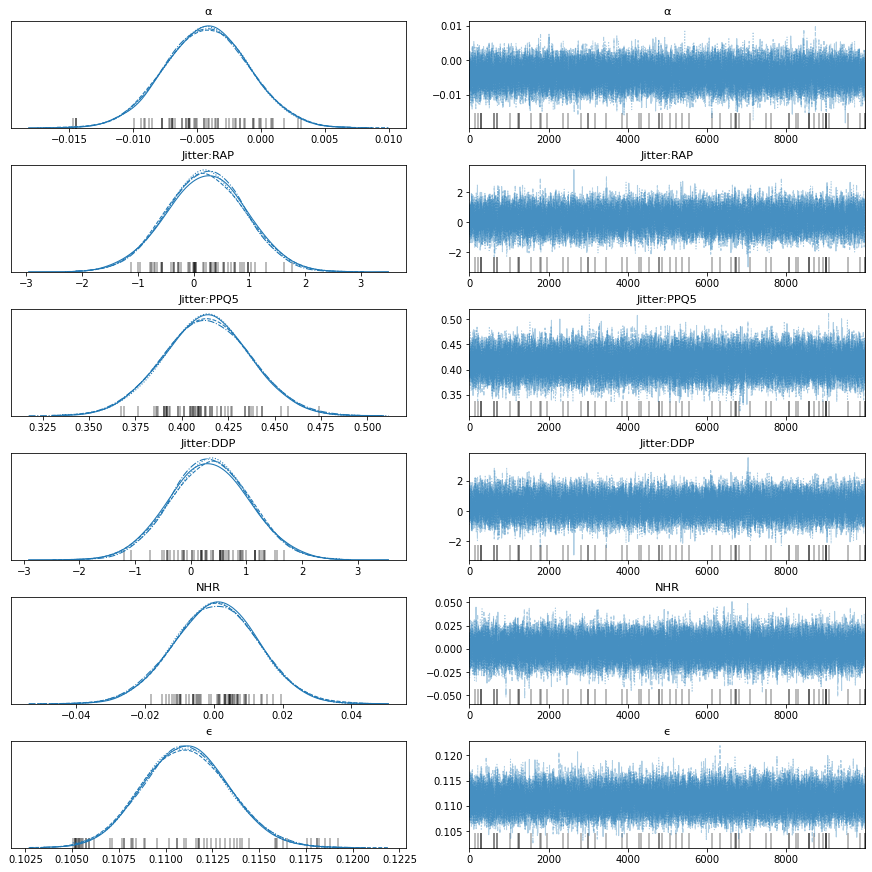

In [71]:
nuts=model_mcmc('NUTS')

In [72]:
model_mlr

In [73]:
df_results_r1

model_name sampling/VI_method  RMSE  \
0                Linear Regression-tain/test dataste                 NA  0.00   
1                Linear Regression-tain/test dataste                 NA  0.12   
2      MLR-Slice-train/test datastet (general priors              Slice  0.13   
3      MLR-Slice-train/test datastet (general priors              Slice  0.00   
4       MLR-NUTS-train/test datastet (general priors               NUTS  0.00   
5     MLR-Slice-train/test datastet (specific priors              Slice  0.00   
6      MLR-NUTS-train/test datastet (specific priors               NUTS  0.00   
7  MLR-Robust-Slice-train/test datastet (general ...              Slice  0.00   
8  MLR-Robust-Slice-train/test datastet (specific...              Slice  0.00   
9       NUTS MLR-Robust-Nuts-train/test datastet (G)               NUTS  0.12   

   MSE   R2  Adj_R2                                 model_details  
0 0.00 0.96    0.96                            LinearRegression()  
1 0.02 0.96    0.96                            LinearRegression()  
2 0.02 0.96    0.96  <pymc3.model.Model object at 0x7f3d3357dd90>  
3 0.00 0.96    0.96  <pymc3.model.Model object at 0x7f3d28979710>  
4 0.00 0.96    0.96  <pymc3.model.Model object at 0x7f3d3c78b250>  
5 0.00 0.96    0.96  <pymc3.model.Model object at 0x7f3d29598810>  
6 0.00 0.96    0.96  <pymc3.model.Model object at 0x7f3d214b9450>  
7 0.00 0.97    0.97  <pymc3.model.Model object at 0x7f3d3c484e10>  
8 0.00 0.97    0.97  <pymc3.model.Model object at 0x7f3d1e7d2810>  
9 0.02 0.96    0.96  <pymc3.model.Model object at 0x7f3d3d55ee90>

## HMC

Multiprocess sampling (4 chains in 4 jobs)
HamiltonianMC: [ϵ, NHR, Jitter:DDP, Jitter:PPQ5, Jitter:RAP, α]


Sampling 4 chains for 1_000 tune and 10_000 draw iterations (4_000 + 40_000 draws total) took 655 seconds.
There were 5 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.7453528952469208, but should be close to 0.65. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.7494644320910681, but should be close to 0.65. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.7849524888039098, but should be close to 0.65. Try to increase the number of tuning steps.
There were 11 divergences after tuning. Increase `target_accept` or reparameterize.


4
1762
Root mean square error :  0.12498822944826893
Mean square error :  0.01562205750061312
R2-score :  0.9635647095460871
Adjusted R2-score :  0.9634817606776661
             mean   sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_mean  \
α           -0.00 0.00   -0.01     0.00       0.00     0.00  43230.00   
Jitter:RAP   0.23 0.70   -1.04     1.58       0.01     0.00  19730.00   
Jitter:PPQ5  0.41 0.02    0.37     0.46       0.00     0.00  31490.00   
Jitter:DDP   0.34 0.70   -0.99     1.64       0.01     0.00  19739.00   
NHR          0.00 0.01   -0.02     0.02       0.00     0.00  27288.00   
ϵ            0.11 0.00    0.11     0.12       0.00     0.00  45266.00   

              ess_sd  ess_bulk  ess_tail  r_hat  
α           33871.00  43283.00  23420.00   1.00  
Jitter:RAP  19730.00  19736.00  21668.00   1.00  
Jitter:PPQ5 31308.00  31519.00  14735.00   1.00  
Jitter:DDP  19739.00  19744.00  21642.00   1.00  
NHR         18807.00  27283.00  21373.00   1.00  
ϵ           45058.00  4

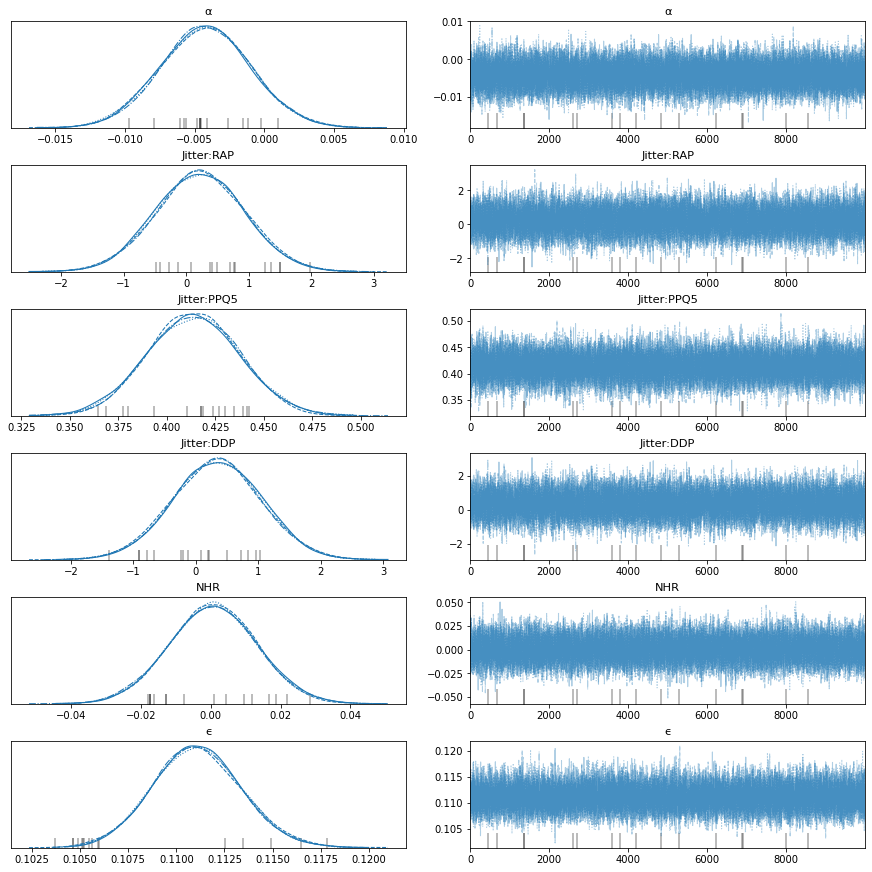

In [74]:
hmc=model_mcmc('HMC')

In [75]:
model_mlr

## Metrolpis

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [ϵ]
>Metropolis: [NHR]
>Metropolis: [Jitter:DDP]
>Metropolis: [Jitter:PPQ5]
>Metropolis: [Jitter:RAP]
>Metropolis: [α]


Sampling 4 chains for 1_000 tune and 10_000 draw iterations (4_000 + 40_000 draws total) took 51 seconds.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.


4
1762
Root mean square error :  0.12484269726723217
Mean square error :  0.015585699060957778
R2-score :  0.9636495082551715
Adjusted R2-score :  0.9635667524401577
             mean   sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_mean  ess_sd  \
α           -0.00 0.00   -0.01     0.00       0.00     0.00   3055.00 2942.00   
Jitter:RAP   0.14 0.33   -0.36     0.60       0.17     0.13      4.00    4.00   
Jitter:PPQ5  0.41 0.02    0.37     0.46       0.00     0.00    101.00  101.00   
Jitter:DDP   0.43 0.33   -0.04     0.91       0.17     0.13      4.00    4.00   
NHR          0.00 0.01   -0.02     0.02       0.00     0.00    301.00  301.00   
ϵ            0.11 0.00    0.11     0.12       0.00     0.00   3682.00 3682.00   

             ess_bulk  ess_tail  r_hat  
α             3047.00   3173.00   1.00  
Jitter:RAP       5.00     11.00   2.96  
Jitter:PPQ5    101.00    280.00   1.02  
Jitter:DDP       5.00     11.00   3.02  
NHR            303.00    758.00   1.01  
ϵ             3660.0

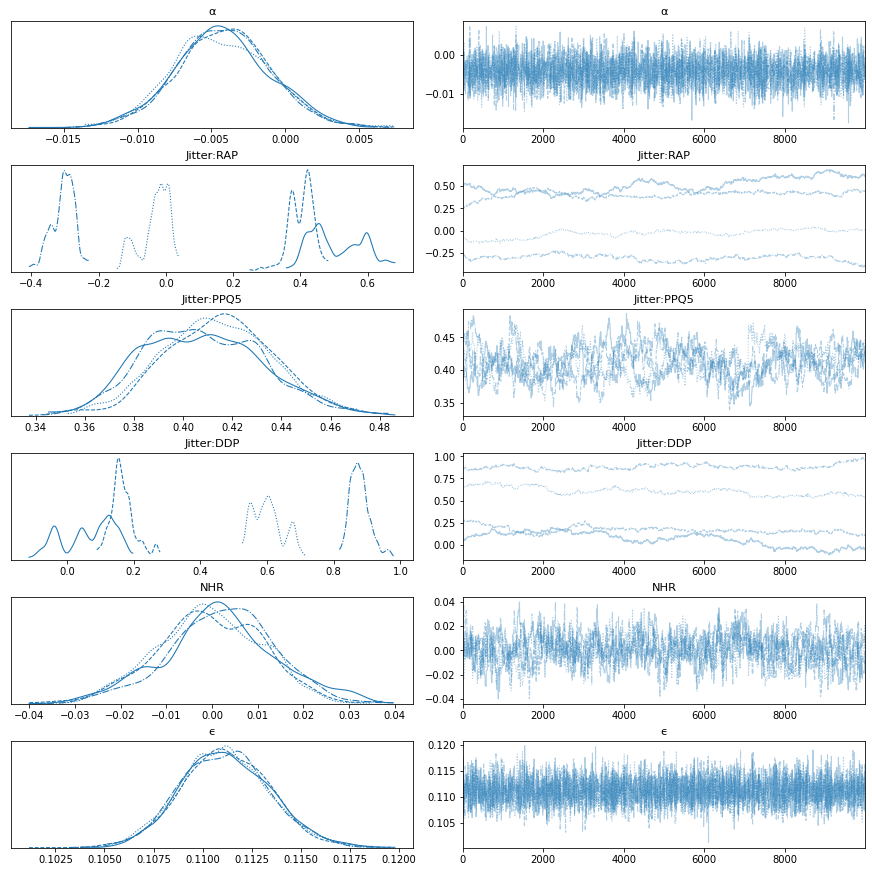

In [76]:
metrolpis=model_mcmc('metropolis')

In [77]:
model_mlr

In [78]:
df_results_r1

model_name sampling/VI_method  \
0                 Linear Regression-tain/test dataste                 NA   
1                 Linear Regression-tain/test dataste                 NA   
2       MLR-Slice-train/test datastet (general priors              Slice   
3       MLR-Slice-train/test datastet (general priors              Slice   
4        MLR-NUTS-train/test datastet (general priors               NUTS   
5      MLR-Slice-train/test datastet (specific priors              Slice   
6       MLR-NUTS-train/test datastet (specific priors               NUTS   
7   MLR-Robust-Slice-train/test datastet (general ...              Slice   
8   MLR-Robust-Slice-train/test datastet (specific...              Slice   
9        NUTS MLR-Robust-Nuts-train/test datastet (G)               NUTS   
10        HMC MLR-Robust-Nuts-train/test datastet (G)                HMC   
11  metropolis MLR-Robust-Nuts-train/test datastet...         metropolis   

    RMSE  MSE   R2  Adj_R2                                 model_details  
0   0.00 0.00 0.96    0.96                            LinearRegression()  
1   0.12 0.02 0.96    0.96                            LinearRegression()  
2   0.13 0.02 0.96    0.96  <pymc3.model.Model object at 0x7f3d3357dd90>  
3   0.00 0.00 0.96    0.96  <pymc3.model.Model object at 0x7f3d28979710>  
4   0.00 0.00 0.96    0.96  <pymc3.model.Model object at 0x7f3d3c78b250>  
5   0.00 0.00 0.96    0.96  <pymc3.model.Model object at 0x7f3d29598810>  
6   0.00 0.00 0.96    0.96  <pymc3.model.Model object at 0x7f3d214b9450>  
7   0.00 0.00 0.97    0.97  <pymc3.model.Model object at 0x7f3d3c484e10>  
8   0.00 0.00 0.97    0.97  <pymc3.model.Model object at 0x7f3d1e7d2810>  
9   0.12 0.02 0.96    0.96  <pymc3.model.Model object at 0x7f3d3d55ee90>  
10  0.12 0.02 0.96    0.96  <pymc3.model.Model object at 0x7f3d29382390>  
11  0.12 0.02 0.96    0.96  <pymc3.model.Model object at 0x7f3d1df9d890>

## Slice

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Slice: [ϵ]
>Slice: [NHR]
>Slice: [Jitter:DDP]
>Slice: [Jitter:PPQ5]
>Slice: [Jitter:RAP]
>Slice: [α]


Sampling 4 chains for 1_000 tune and 10_000 draw iterations (4_000 + 40_000 draws total) took 47 seconds.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.


4
1762
Root mean square error :  0.12492814390840158
Mean square error :  0.015607041140398296
R2-score :  0.9635997321700895
Adjusted R2-score :  0.9635168630344495
             mean   sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_mean  \
α           -0.00 0.00   -0.01     0.00       0.00     0.00  38220.00   
Jitter:RAP  -0.75 0.22   -1.15    -0.37       0.09     0.07      6.00   
Jitter:PPQ5  0.41 0.02    0.37     0.46       0.00     0.00    583.00   
Jitter:DDP   1.32 0.22    0.95     1.72       0.09     0.07      6.00   
NHR          0.00 0.01   -0.02     0.02       0.00     0.00   1594.00   
ϵ            0.11 0.00    0.11     0.12       0.00     0.00  39167.00   

              ess_sd  ess_bulk  ess_tail  r_hat  
α           31092.00  38223.00  28283.00   1.00  
Jitter:RAP      6.00      7.00     36.00   1.63  
Jitter:PPQ5   583.00    583.00   1436.00   1.01  
Jitter:DDP      6.00      6.00     34.00   1.64  
NHR          1594.00   1595.00   4420.00   1.00  
ϵ           39110.00  

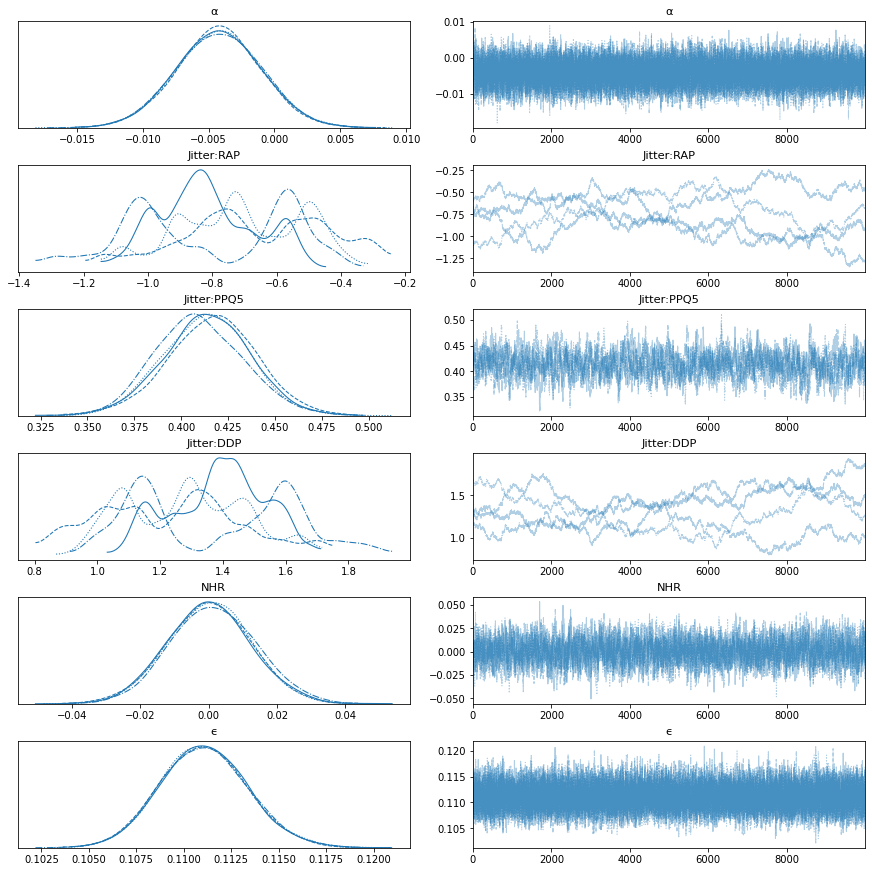

In [79]:
slice= model_mcmc('slice')

# Variational Inference Methods

## ADVI

for VI


Finished [100%]: Average Loss = 1,086.6


4
1762
Root mean square error :  0.14481033316111616
Mean square error :  0.020970032590233462
R2-score :  0.951091638971167
Adjusted R2-score :  0.950980293812308


arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 10000), minimum_shape: (chains=2, draws=4)
arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 10000), minimum_shape: (chains=2, draws=4)
arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 10000), minimum_shape: (chains=2, draws=4)
arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 10000), minimum_shape: (chains=2, draws=4)
arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 10000), minimum_shape: (chains=2, draws=4)
arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 10000), minimum_shape: (chains=2, draws=4)
arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 10000), minimum_shape: (chains=2, draws=4)
arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 10000), minimum_shape: (chains=2, draws=4)
arviz.stats.stats_utils - WARNIN

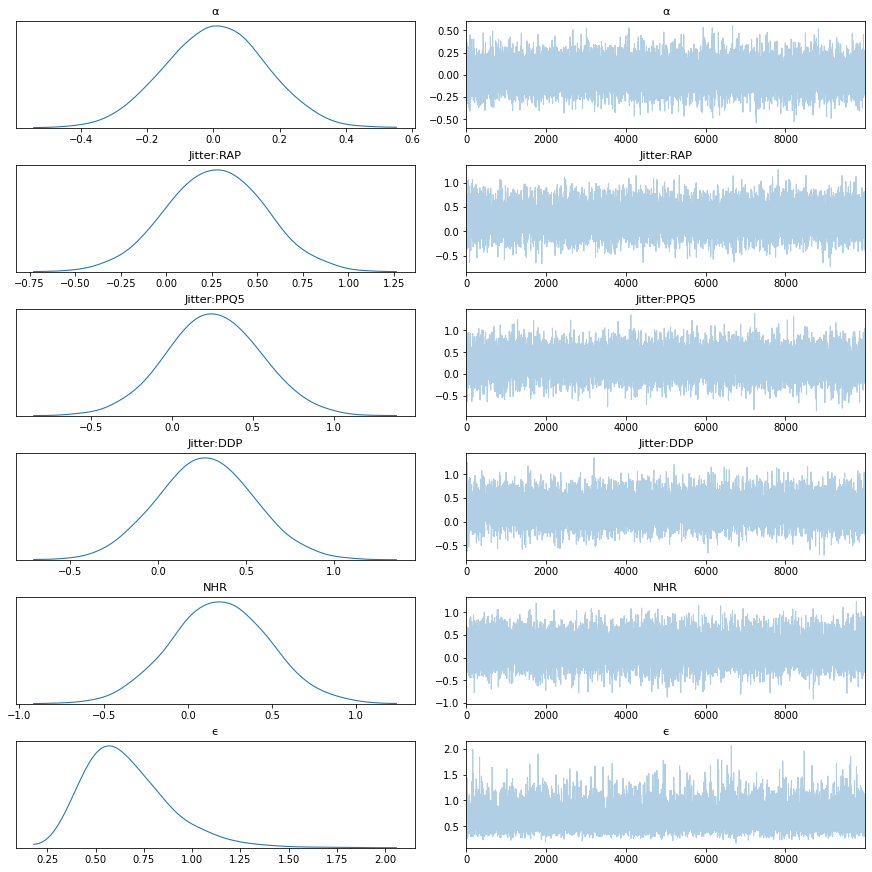

In [80]:
advi=model_vi('advi')

## fullrank advi

for VI


Finished [100%]: Average Loss = 35.967


4
1762
Root mean square error :  0.12385941302266694
Mean square error :  0.015341154194319596
R2-score :  0.9642198597114138
Adjusted R2-score :  0.964138402363005


arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 10000), minimum_shape: (chains=2, draws=4)
arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 10000), minimum_shape: (chains=2, draws=4)
arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 10000), minimum_shape: (chains=2, draws=4)
arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 10000), minimum_shape: (chains=2, draws=4)
arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 10000), minimum_shape: (chains=2, draws=4)
arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 10000), minimum_shape: (chains=2, draws=4)
arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 10000), minimum_shape: (chains=2, draws=4)
arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 10000), minimum_shape: (chains=2, draws=4)
arviz.stats.stats_utils - WARNIN

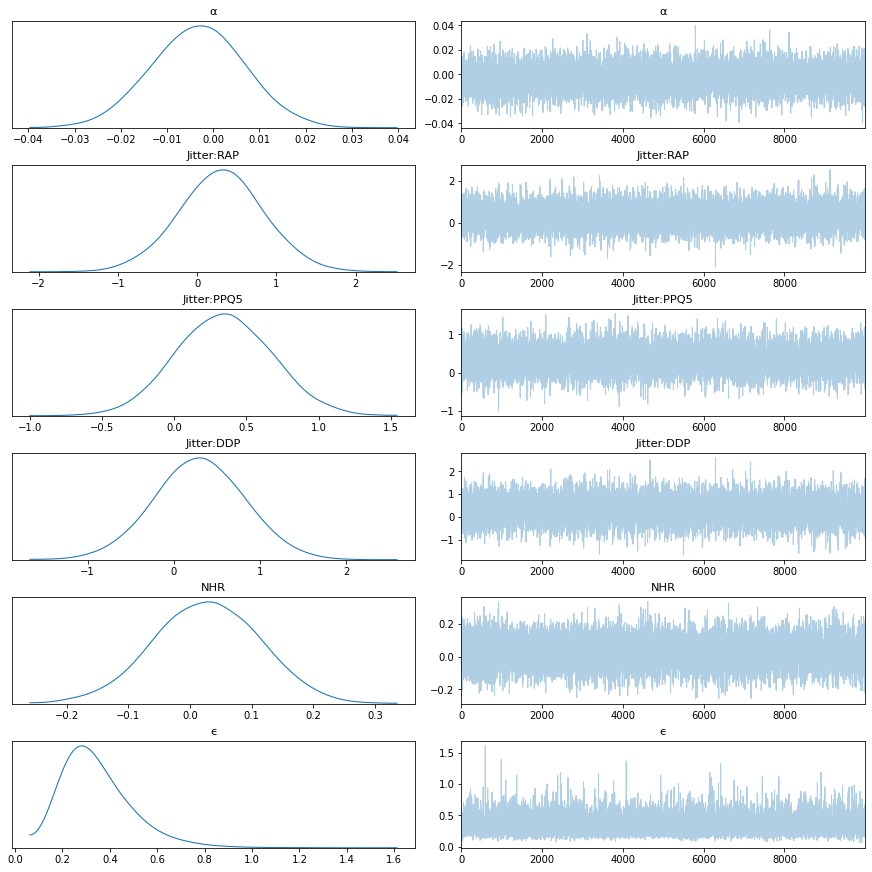

In [81]:
fr_advi=model_vi('fullrank_advi')

## svgd

for VI


4
1762
Root mean square error :  0.125144123052681
Mean square error :  0.015661051534624566
R2-score :  0.9634737638460651
Adjusted R2-score :  0.9633906079299491


arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 10000), minimum_shape: (chains=2, draws=4)
arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 10000), minimum_shape: (chains=2, draws=4)
arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 10000), minimum_shape: (chains=2, draws=4)
arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 10000), minimum_shape: (chains=2, draws=4)
arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 10000), minimum_shape: (chains=2, draws=4)
arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 10000), minimum_shape: (chains=2, draws=4)
arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 10000), minimum_shape: (chains=2, draws=4)
arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 10000), minimum_shape: (chains=2, draws=4)
arviz.stats.stats_utils - WARNIN

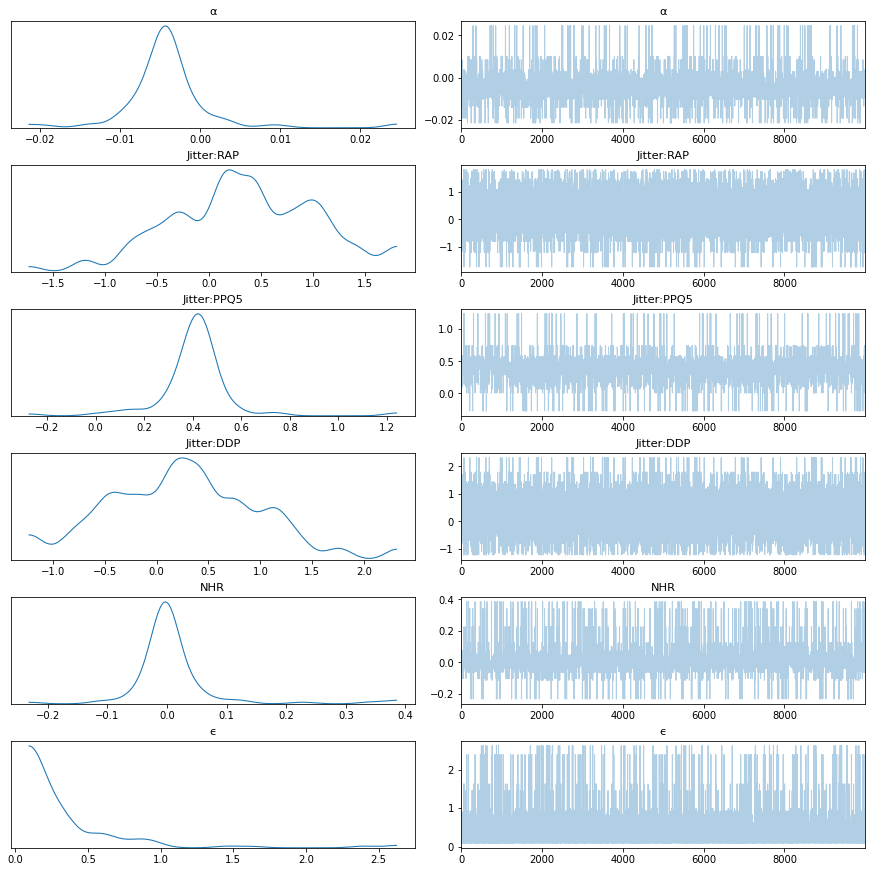

In [82]:
svgd= model_vi('svgd')

In [85]:
pd.set_option('display.max_colwidth', None)
# pd.set_option('display.max_columns', 500)

In [86]:
df_results_r1

model_name sampling/VI_method  \
0                     Linear Regression-tain/test dataste                 NA   
1                     Linear Regression-tain/test dataste                 NA   
2           MLR-Slice-train/test datastet (general priors              Slice   
3           MLR-Slice-train/test datastet (general priors              Slice   
4            MLR-NUTS-train/test datastet (general priors               NUTS   
5          MLR-Slice-train/test datastet (specific priors              Slice   
6           MLR-NUTS-train/test datastet (specific priors               NUTS   
7    MLR-Robust-Slice-train/test datastet (general priors              Slice   
8   MLR-Robust-Slice-train/test datastet (specific priors              Slice   
9            NUTS MLR-Robust-Nuts-train/test datastet (G)               NUTS   
10            HMC MLR-Robust-Nuts-train/test datastet (G)                HMC   
11     metropolis MLR-Robust-Nuts-train/test datastet (G)         metropolis   
12          slice MLR-Robust-Nuts-train/test datastet (G)              slice   
13           advi MLR-Robust-Nuts-train/test datastet (G)               advi   
14  fullrank_advi MLR-Robust-Nuts-train/test datastet (G)      fullrank_advi   
15           svgd MLR-Robust-Nuts-train/test datastet (G)               svgd   

    RMSE  MSE   R2  Adj_R2                                 model_details  
0   0.00 0.00 0.96    0.96                            LinearRegression()  
1   0.12 0.02 0.96    0.96                            LinearRegression()  
2   0.13 0.02 0.96    0.96  <pymc3.model.Model object at 0x7f3d3357dd90>  
3   0.00 0.00 0.96    0.96  <pymc3.model.Model object at 0x7f3d28979710>  
4   0.00 0.00 0.96    0.96  <pymc3.model.Model object at 0x7f3d3c78b250>  
5   0.00 0.00 0.96    0.96  <pymc3.model.Model object at 0x7f3d29598810>  
6   0.00 0.00 0.96    0.96  <pymc3.model.Model object at 0x7f3d214b9450>  
7   0.00 0.00 0.97    0.97  <pymc3.model.Model object at 0x7f3d3c484e10>  
8   0.00 0.00 0.97    0.97  <pymc3.model.Model object at 0x7f3d1e7d2810>  
9   0.12 0.02 0.96    0.96  <pymc3.model.Model object at 0x7f3d3d55ee90>  
10  0.12 0.02 0.96    0.96  <pymc3.model.Model object at 0x7f3d29382390>  
11  0.12 0.02 0.96    0.96  <pymc3.model.Model object at 0x7f3d1df9d890>  
12  0.12 0.02 0.96    0.96  <pymc3.model.Model object at 0x7f3d1c5db810>  
13  0.14 0.02 0.95    0.95  <pymc3.model.Model object at 0x7f3d214a7710>  
14  0.12 0.02 0.96    0.96  <pymc3.model.Model object at 0x7f3d1d8152d0>  
15  0.13 0.02 0.96    0.96  <pymc3.model.Model object at 0x7f3d15314a90>

In [90]:
df_reults_r1=df_results_r1.sort_values('Adj_R2',ascending=False)

df_reults_r1

model_name sampling/VI_method  \
8   MLR-Robust-Slice-train/test datastet (specific priors              Slice   
7    MLR-Robust-Slice-train/test datastet (general priors              Slice   
14  fullrank_advi MLR-Robust-Nuts-train/test datastet (G)      fullrank_advi   
11     metropolis MLR-Robust-Nuts-train/test datastet (G)         metropolis   
3           MLR-Slice-train/test datastet (general priors              Slice   
0                     Linear Regression-tain/test dataste                 NA   
1                     Linear Regression-tain/test dataste                 NA   
12          slice MLR-Robust-Nuts-train/test datastet (G)              slice   
5          MLR-Slice-train/test datastet (specific priors              Slice   
4            MLR-NUTS-train/test datastet (general priors               NUTS   
9            NUTS MLR-Robust-Nuts-train/test datastet (G)               NUTS   
10            HMC MLR-Robust-Nuts-train/test datastet (G)                HMC   
2           MLR-Slice-train/test datastet (general priors              Slice   
15           svgd MLR-Robust-Nuts-train/test datastet (G)               svgd   
6           MLR-NUTS-train/test datastet (specific priors               NUTS   
13           advi MLR-Robust-Nuts-train/test datastet (G)               advi   

    RMSE  MSE   R2  Adj_R2                                 model_details  
8   0.00 0.00 0.97    0.97  <pymc3.model.Model object at 0x7f3d1e7d2810>  
7   0.00 0.00 0.97    0.97  <pymc3.model.Model object at 0x7f3d3c484e10>  
14  0.12 0.02 0.96    0.96  <pymc3.model.Model object at 0x7f3d1d8152d0>  
11  0.12 0.02 0.96    0.96  <pymc3.model.Model object at 0x7f3d1df9d890>  
3   0.00 0.00 0.96    0.96  <pymc3.model.Model object at 0x7f3d28979710>  
0   0.00 0.00 0.96    0.96                            LinearRegression()  
1   0.12 0.02 0.96    0.96                            LinearRegression()  
12  0.12 0.02 0.96    0.96  <pymc3.model.Model object at 0x7f3d1c5db810>  
5   0.00 0.00 0.96    0.96  <pymc3.model.Model object at 0x7f3d29598810>  
4   0.00 0.00 0.96    0.96  <pymc3.model.Model object at 0x7f3d3c78b250>  
9   0.12 0.02 0.96    0.96  <pymc3.model.Model object at 0x7f3d3d55ee90>  
10  0.12 0.02 0.96    0.96  <pymc3.model.Model object at 0x7f3d29382390>  
2   0.13 0.02 0.96    0.96  <pymc3.model.Model object at 0x7f3d3357dd90>  
15  0.13 0.02 0.96    0.96  <pymc3.model.Model object at 0x7f3d15314a90>  
6   0.00 0.00 0.96    0.96  <pymc3.model.Model object at 0x7f3d214b9450>  
13  0.14 0.02 0.95    0.95  <pymc3.model.Model object at 0x7f3d214a7710>

In [91]:
# save the final data
df_results_r1.to_csv('df_results_r3-f.csv',index=False)

## Conclusion

#### We can see that MCMC models have performed better than VI models
#### Also we see the performance of MCMC is at par and a bit better than normal Linear Regression
#### Slice Sampling method gave best result in MCMC model